<a href="https://colab.research.google.com/github/Alfred78w/AI_project/blob/main/Serie_temporelle_Kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Import librebraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# @title Load dataset
# @markdown jkgbhl,jknjbklfcxwbdfxvxc
data = pd.read_csv('train_test_data.csv')

In [ ]:
data

Date   Id_compte  amount_transaction  \
0      2022-01-01 00:23:00   SEWC_CL.1              462.96   
1      2022-01-01 00:26:00  SEW0C_LI.1               15.51   
2      2022-01-01 01:01:00        US.1                2.24   
3      2022-01-01 01:21:00        TA.1                2.86   
4      2022-01-01 01:54:00        US.1                1.68   
...                    ...         ...                 ...   
20406  2022-11-07 05:42:00    SEWC_P.1              264.60   
20407  2022-11-07 05:56:00   SEWC_CL.1                4.63   
20408  2022-11-07 06:36:00   SEWC_PA.1                6.96   
20409  2022-11-07 06:37:00  SEW0C_HI.1              448.44   
20410  2022-11-07 06:48:00  SEW0C_HI.1                7.47   

                               category_transaction  
0                          Food & Drink - Groceries  
1      General Services - Home Repair + Maintenance  
2                  Bank Transfers - ATM withdrawals  
3                 Transportation - Public Transport  
4                  Bank Transfers - ATM withdrawals  
...                                             ...  
20406          Medical - Pharmacies and supplements  
20407                     Bank Transfers - ATM fees  
20408                      Transportation - Parking  
20409                         Subscription - Others  
20410              Bank Transfers - ATM withdrawals  

[20411 rows x 4 columns]

In [ ]:
# @title Describe data

print(data.dtypes)

Date                     object
Id_compte                object
amount_transaction      float64
category_transaction     object
dtype: object


In [ ]:
data

Date   Id_compte  amount_transaction  \
0      2022-01-01 00:23:00   SEWC_CL.1              462.96   
1      2022-01-01 00:26:00  SEW0C_LI.1               15.51   
2      2022-01-01 01:01:00        US.1                2.24   
3      2022-01-01 01:21:00        TA.1                2.86   
4      2022-01-01 01:54:00        US.1                1.68   
...                    ...         ...                 ...   
20406  2022-11-07 05:42:00    SEWC_P.1              264.60   
20407  2022-11-07 05:56:00   SEWC_CL.1                4.63   
20408  2022-11-07 06:36:00   SEWC_PA.1                6.96   
20409  2022-11-07 06:37:00  SEW0C_HI.1              448.44   
20410  2022-11-07 06:48:00  SEW0C_HI.1                7.47   

                               category_transaction  
0                          Food & Drink - Groceries  
1      General Services - Home Repair + Maintenance  
2                  Bank Transfers - ATM withdrawals  
3                 Transportation - Public Transport  
4                  Bank Transfers - ATM withdrawals  
...                                             ...  
20406          Medical - Pharmacies and supplements  
20407                     Bank Transfers - ATM fees  
20408                      Transportation - Parking  
20409                         Subscription - Others  
20410              Bank Transfers - ATM withdrawals  

[20411 rows x 4 columns]

# Analyse d'exploration

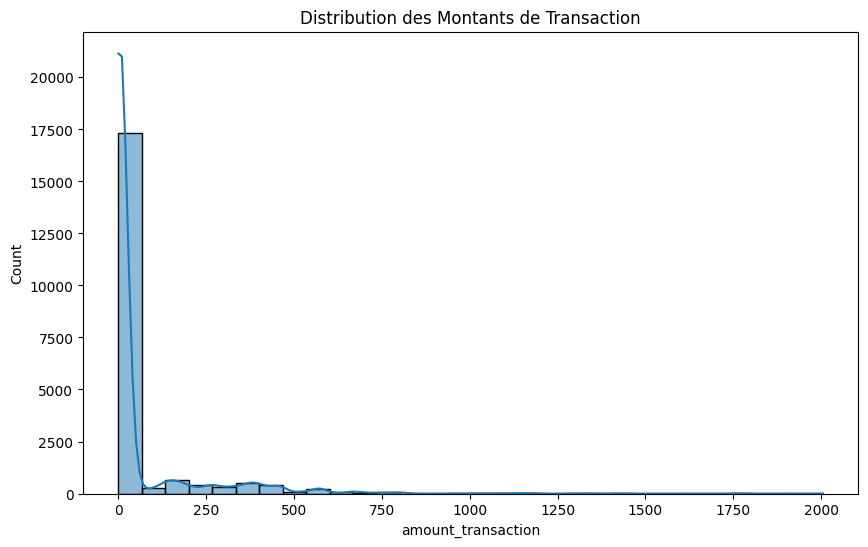

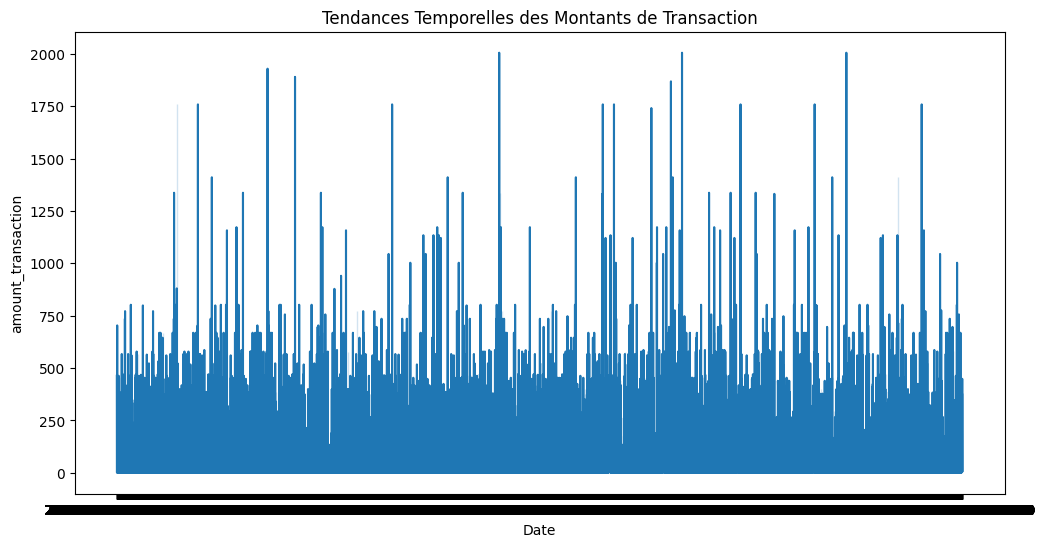

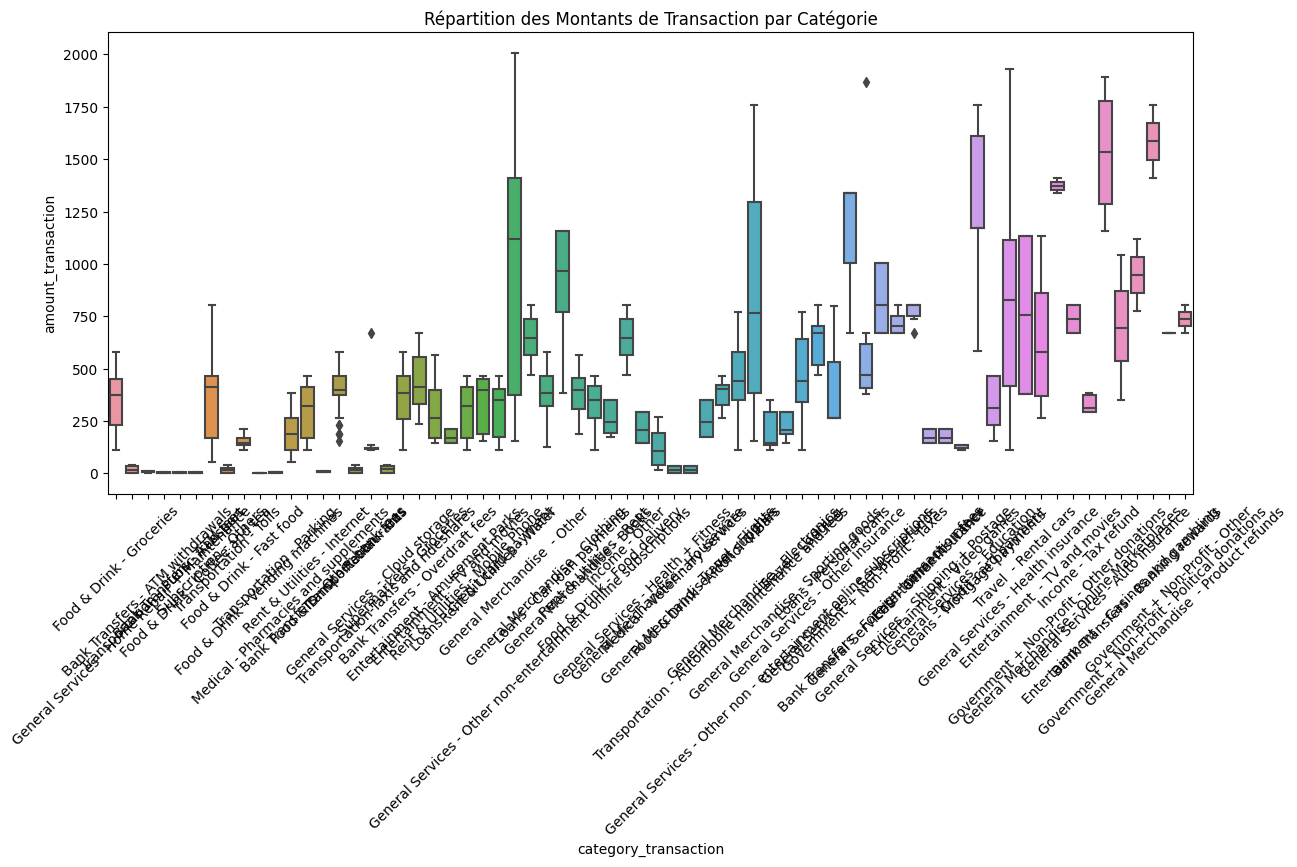

In [ ]:
# Distribution des Montants de Transaction
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='amount_transaction', bins=30, kde=True)
plt.title('Distribution des Montants de Transaction')
plt.show()

# Tendances Temporelles
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='amount_transaction')
plt.title('Tendances Temporelles des Montants de Transaction')
plt.show()

# Analyse par Catégorie de Transaction
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='category_transaction', y='amount_transaction')
plt.title('Répartition des Montants de Transaction par Catégorie')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Analyse des Jours de la Semaine
data['weekday'] = data['Date'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='weekday', y='amount_transaction', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Répartition des Montants de Transaction par Jour de la Semaine')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='weekday', y='amount_transaction')
plt.title('Répartition des Montants de Transaction par Jour de la Semaine')
plt.show()

# Analyse des Comptes Clients
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='amount_transaction', hue='Id_compte', ci=None)
plt.title('Tendances Temporelles des Montants de Transaction par Compte')
plt.show()

# Saisonnalité et Effets Temporels
data['month'] = data['Date'].dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='month', y='amount_transaction', ci=None)
plt.title('Tendances Mensuelles des Montants de Transaction')
plt.show()


AttributeError: ignored

In [ ]:
# @title Mettre les colonne dans le bon format
# data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Date'] = pd.to_datetime(data['Date']).dt.strftime('%Y-%m-%d')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')


In [ ]:
print(data.dtypes)

In [ ]:
data.describe()

In [ ]:
sns.set_theme()
plt.plot(data['Date'], data['amount_transaction'])

In [ ]:
data = data.sort_values(by=['Date'])
# data['Month'] = data['Date'].dt.month
# data['Day'] = data['Date'].dt.day

In [ ]:
# Créer une nouvelle colonne 'Daily_transaction' représentant le cumul des transactions journalières
Daily_transaction = data.groupby(['Id_compte','Date'])['amount_transaction'].sum()
# Nommer l'agrégation effectuée
Daily_transaction = Daily_transaction.reset_index(name='TotalDailyTransaction')

In [ ]:
Daily_transaction.head(35)

In [ ]:
plt.figure(figsize=(25, 8))

plt.plot(Daily_transaction['TotalDailyTransaction'])

In [ ]:
# Créer une nouvelle colonne 'Daily_transaction' représentant le cumul des transactions journalières
Daily_trans = data.groupby(['Date'])['amount_transaction'].sum()
# Nommer l'agrégation effectuée
Daily_trans = Daily_trans.reset_index(name='TotalDailyTransaction')

In [ ]:
Daily_trans

In [ ]:
#Daily_trans.to_csv('Daily_trans.csv', index=False)

In [ ]:
plt.figure(figsize=(25, 8))

plt.plot(Daily_trans['TotalDailyTransaction'])

In [ ]:
split_date = '2022-06-01'
pjme_train = Daily_trans.loc[Daily_trans.index <= split_date].copy()
pjme_test = Daily_trans.loc[Daily_trans.index > split_date].copy()

# Plot train and test so you can see where we have split
pjme_test \
    .rename(columns={'PJME_MW': 'TEST SET'}) \
    .join(pjme_train.rename(columns={'PJME_MW': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(10, 5), title='PJM East', style='.', ms=1)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#Daily_trans=Daily_trans.set_index('Date')

In [ ]:
print(Daily_trans.dtypes)

Date                     datetime64[ns]
TotalDailyTransaction           float64
dtype: object


In [ ]:
Daily_trans.head(30)

Date  TotalDailyTransaction
0  2022-01-01                2907.32
1  2022-01-02                1100.87
2  2022-01-03                5192.62
3  2022-01-04                3547.83
4  2022-01-05                2992.66
5  2022-01-06                3137.05
6  2022-01-07                1958.84
7  2022-01-08                5769.23
8  2022-01-09                6079.43
9  2022-01-10                4878.05
10 2022-01-11                2958.50
11 2022-01-12                2620.67
12 2022-01-13                3461.82
13 2022-01-14                2636.71
14 2022-01-15                5003.74
15 2022-01-16                5487.16
16 2022-01-17                4151.26
17 2022-01-18                2720.32
18 2022-01-19                2836.06
19 2022-01-20                1898.07
20 2022-01-21                2517.80
21 2022-01-22                8559.74
22 2022-01-23                6007.08
23 2022-01-24                5834.71
24 2022-01-25                1983.87
25 2022-01-26                2206.83
26 2022-01-27                2420.96
27 2022-01-28                1740.40
28 2022-01-29                3209.16
29 2022-01-30                3911.42

In [ ]:
seasonal_decompose?

In [ ]:
Daily_transaction['Date'].dtype

dtype('<M8[ns]')

In [ ]:
Daily_transaction.loc[1]

Id_compte                              CPA.1
Date                     2022-01-02 00:00:00
TotalDailyTransaction                  31.49
Name: 1, dtype: object

In [ ]:
Daily_trans['Month'] = Daily_trans['Date'].dt.month

In [ ]:
Daily_trans.head(32)

Date  TotalDailyTransaction  Month
0  2022-01-01                2907.32      1
1  2022-01-02                1100.87      1
2  2022-01-03                5192.62      1
3  2022-01-04                3547.83      1
4  2022-01-05                2992.66      1
5  2022-01-06                3137.05      1
6  2022-01-07                1958.84      1
7  2022-01-08                5769.23      1
8  2022-01-09                6079.43      1
9  2022-01-10                4878.05      1
10 2022-01-11                2958.50      1
11 2022-01-12                2620.67      1
12 2022-01-13                3461.82      1
13 2022-01-14                2636.71      1
14 2022-01-15                5003.74      1
15 2022-01-16                5487.16      1
16 2022-01-17                4151.26      1
17 2022-01-18                2720.32      1
18 2022-01-19                2836.06      1
19 2022-01-20                1898.07      1
20 2022-01-21                2517.80      1
21 2022-01-22                8559.74      1
22 2022-01-23                6007.08      1
23 2022-01-24                5834.71      1
24 2022-01-25                1983.87      1
25 2022-01-26                2206.83      1
26 2022-01-27                2420.96      1
27 2022-01-28                1740.40      1
28 2022-01-29                3209.16      1
29 2022-01-30                3911.42      1
30 2022-01-31                4724.43      1
31 2022-02-01                4586.96      2

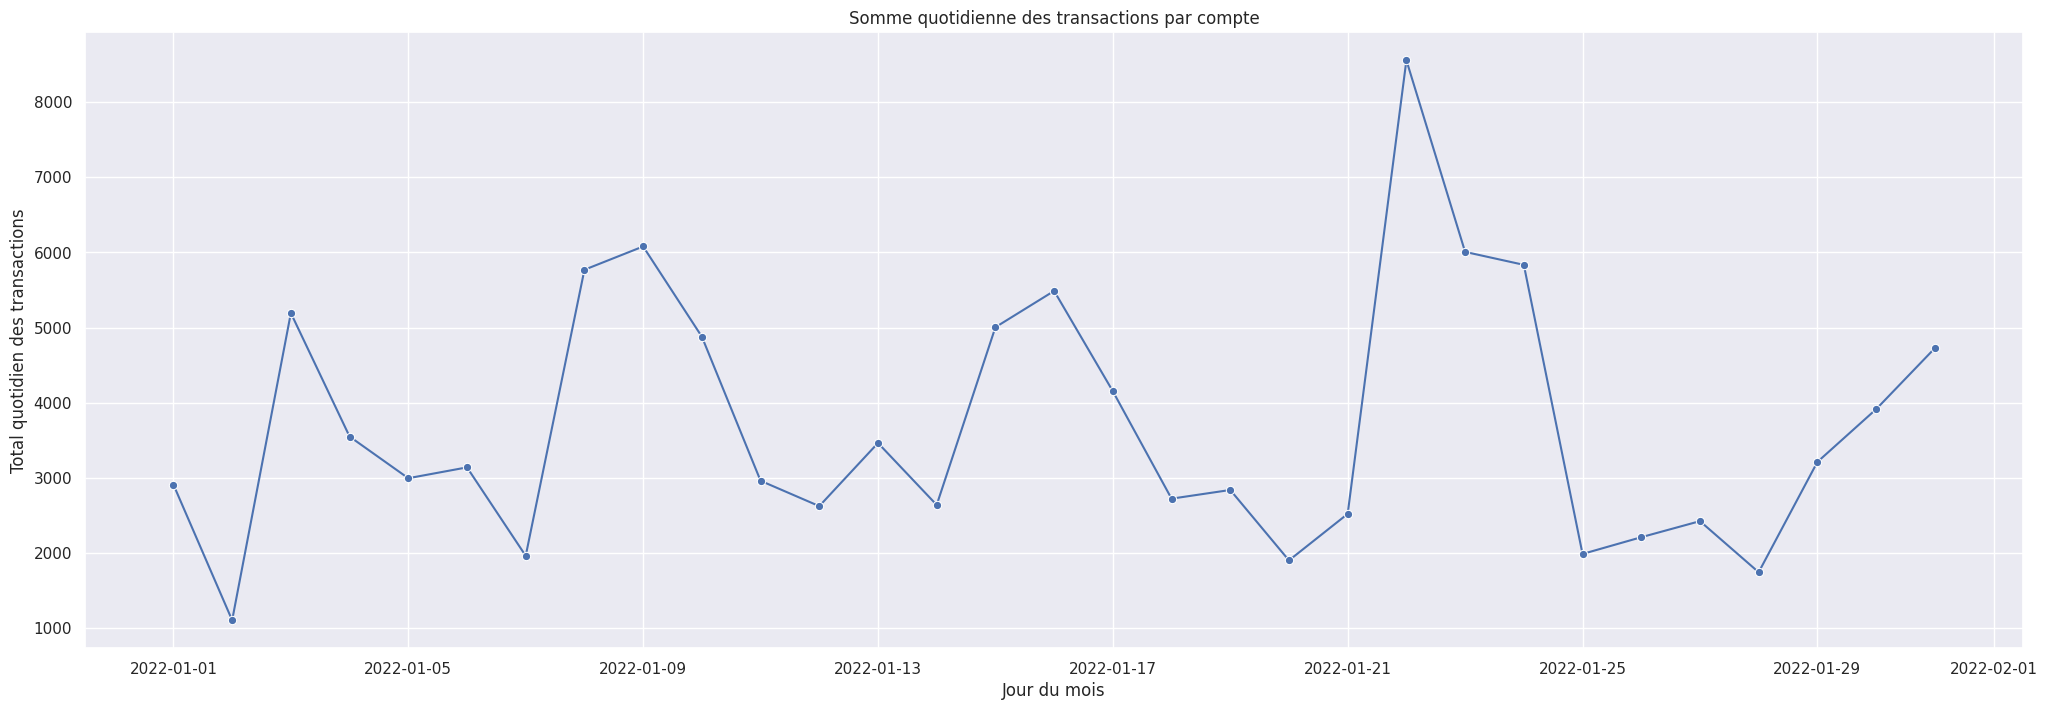

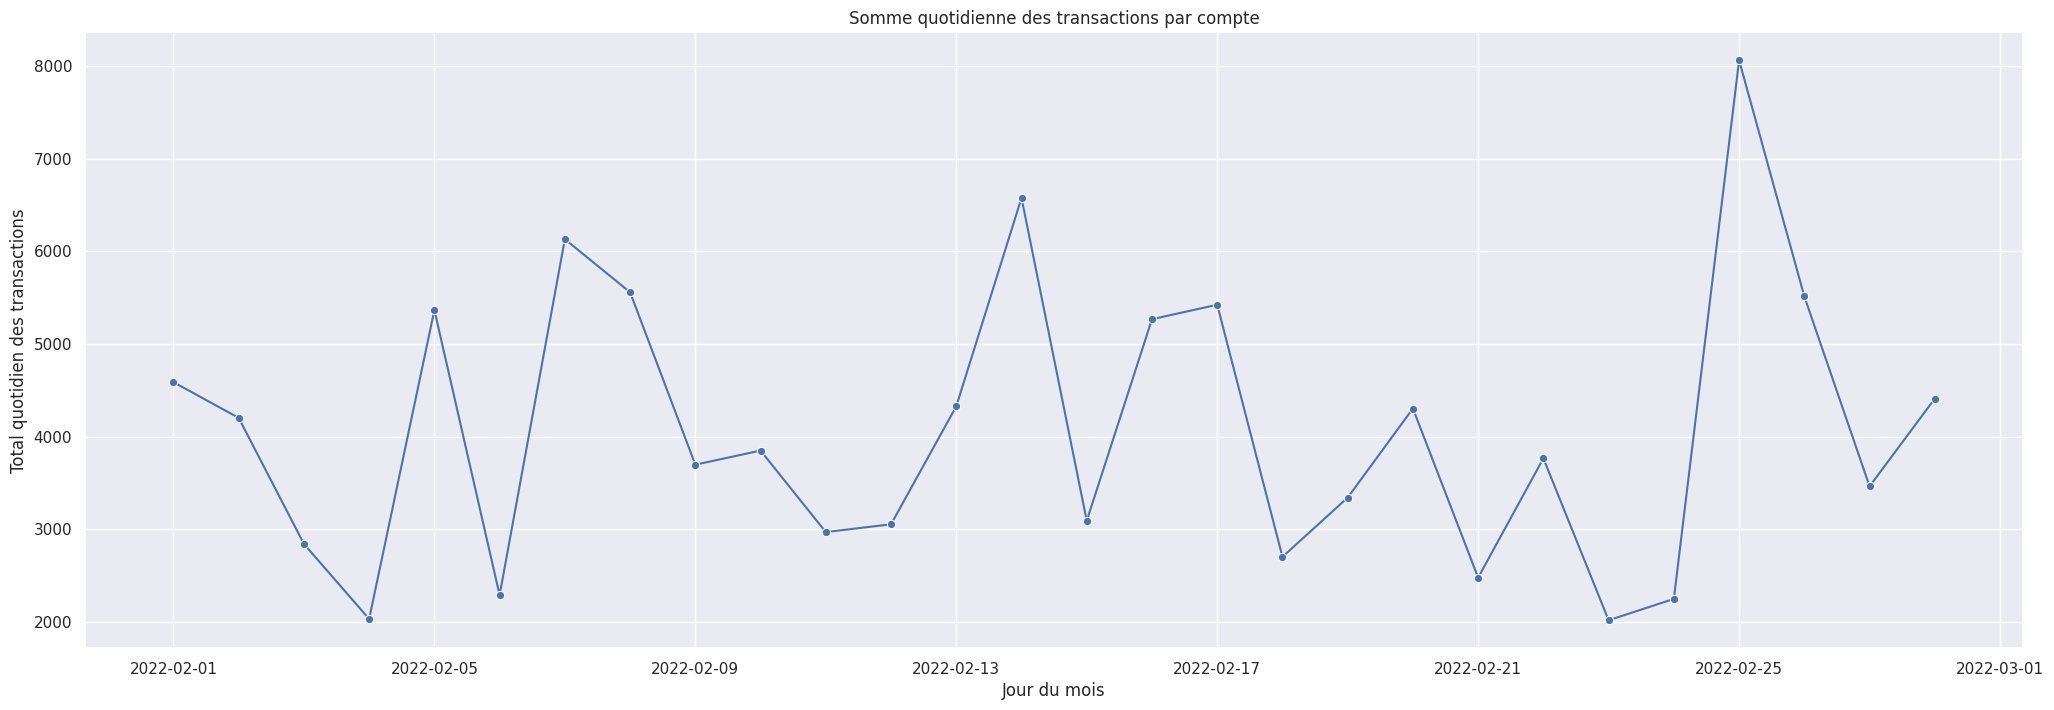

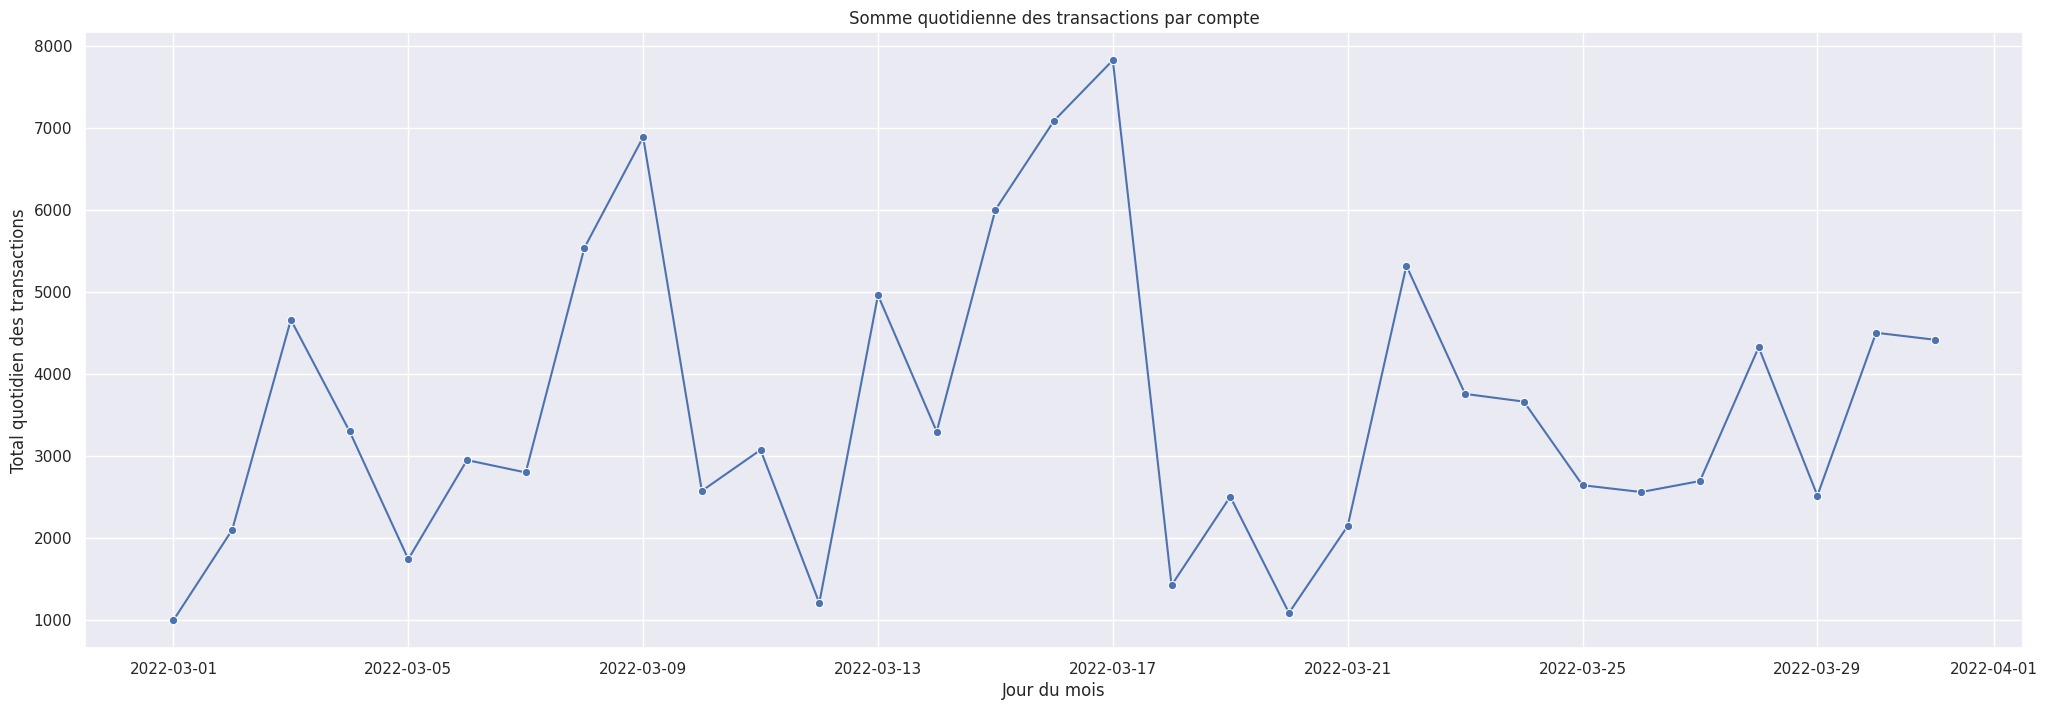

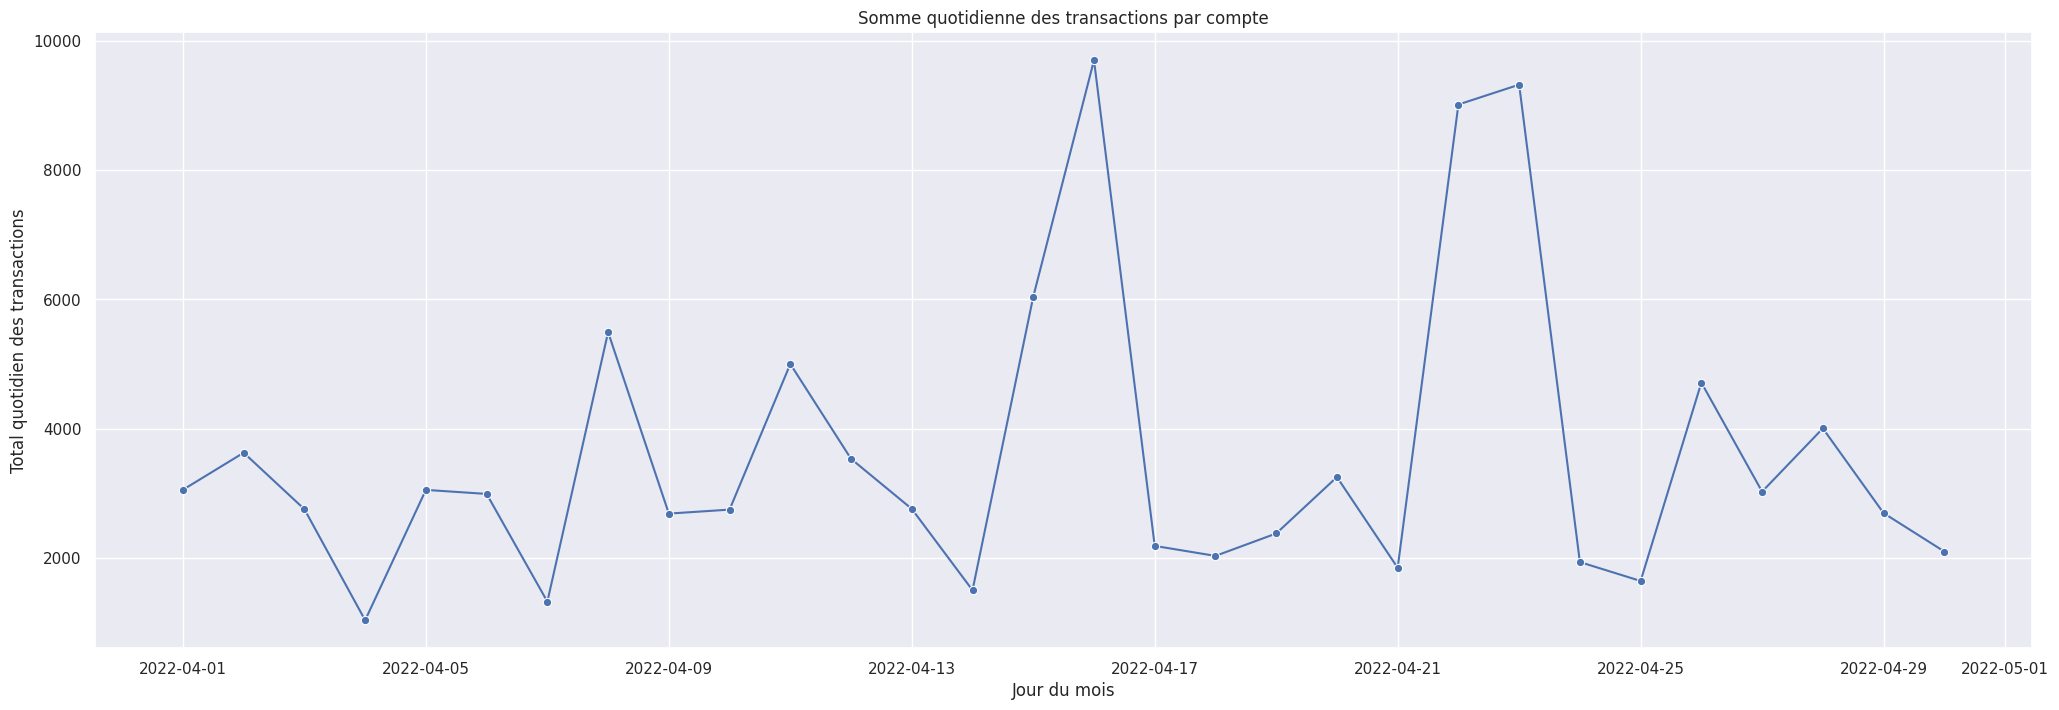

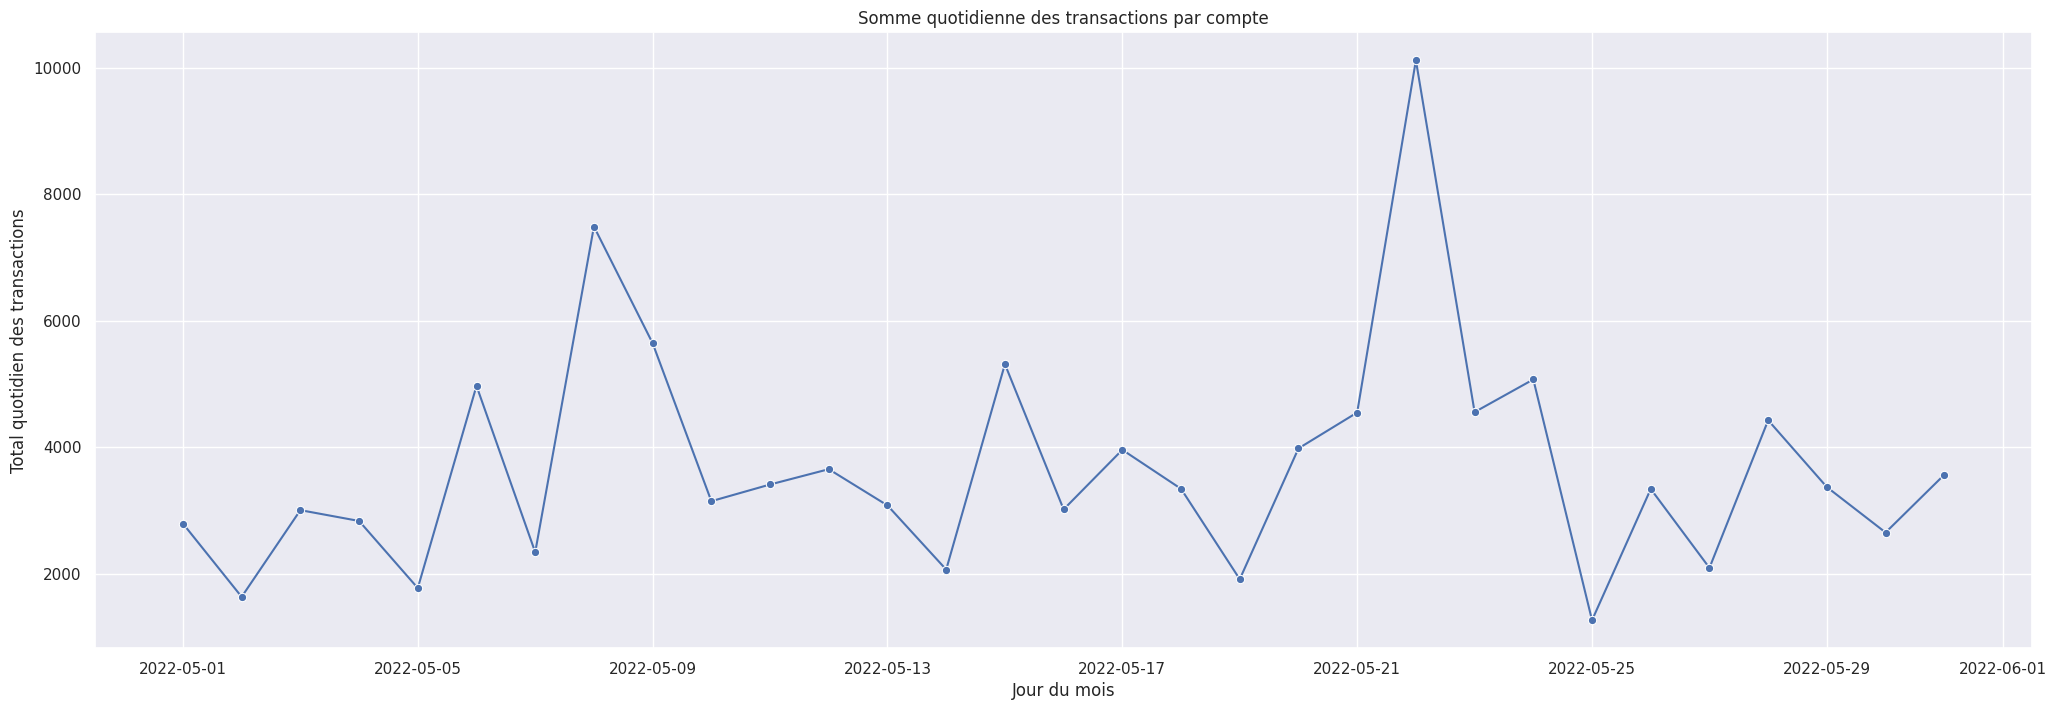

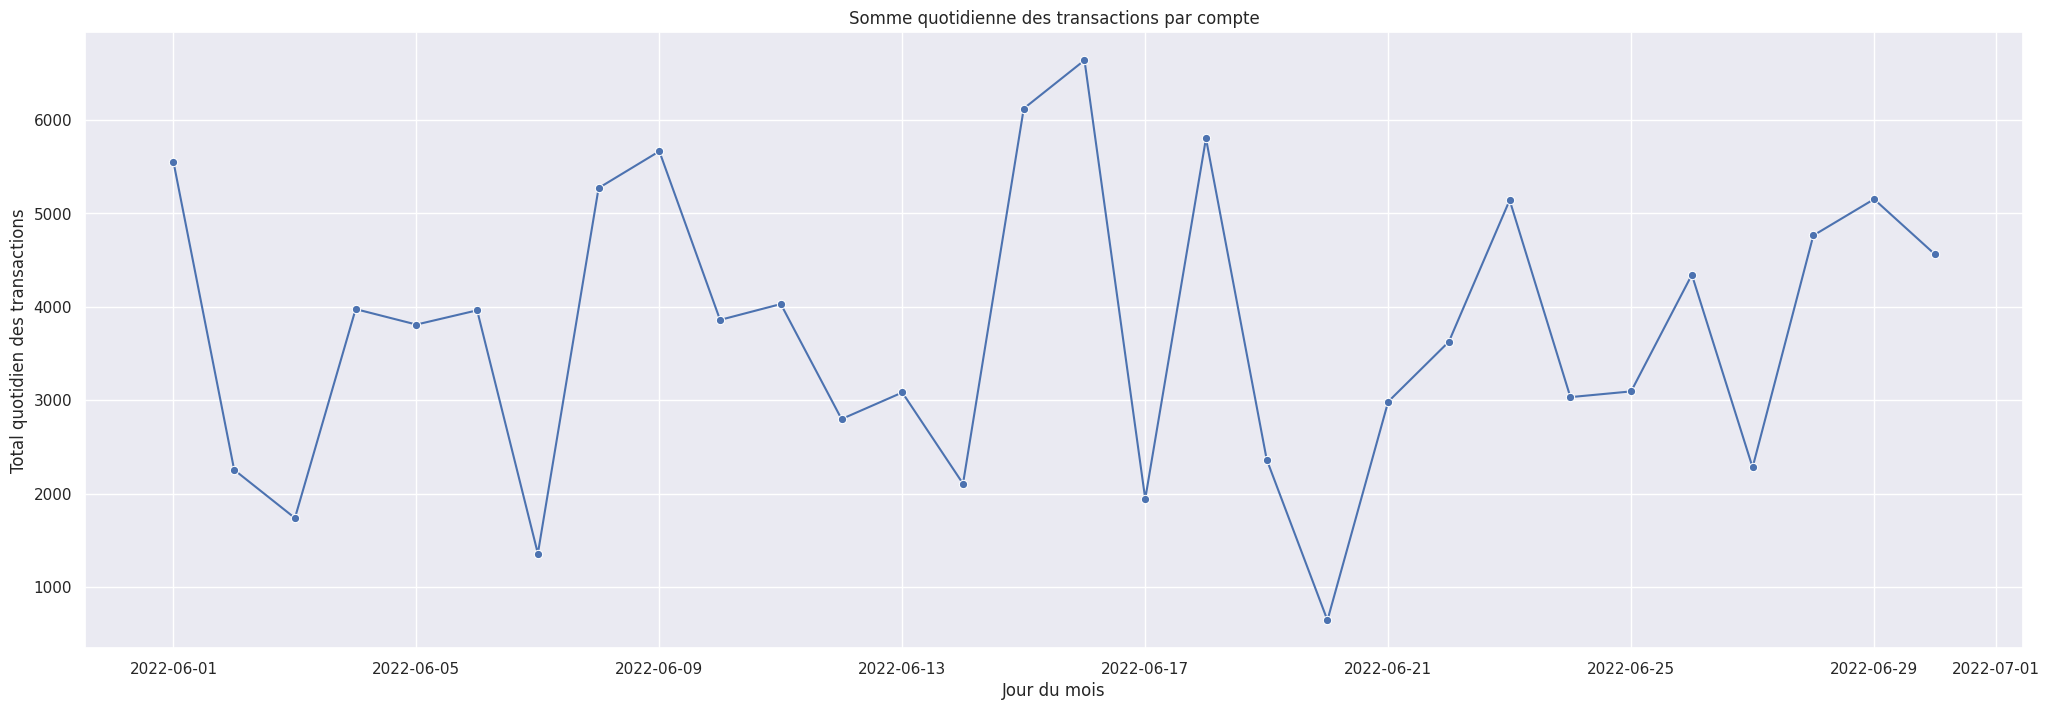

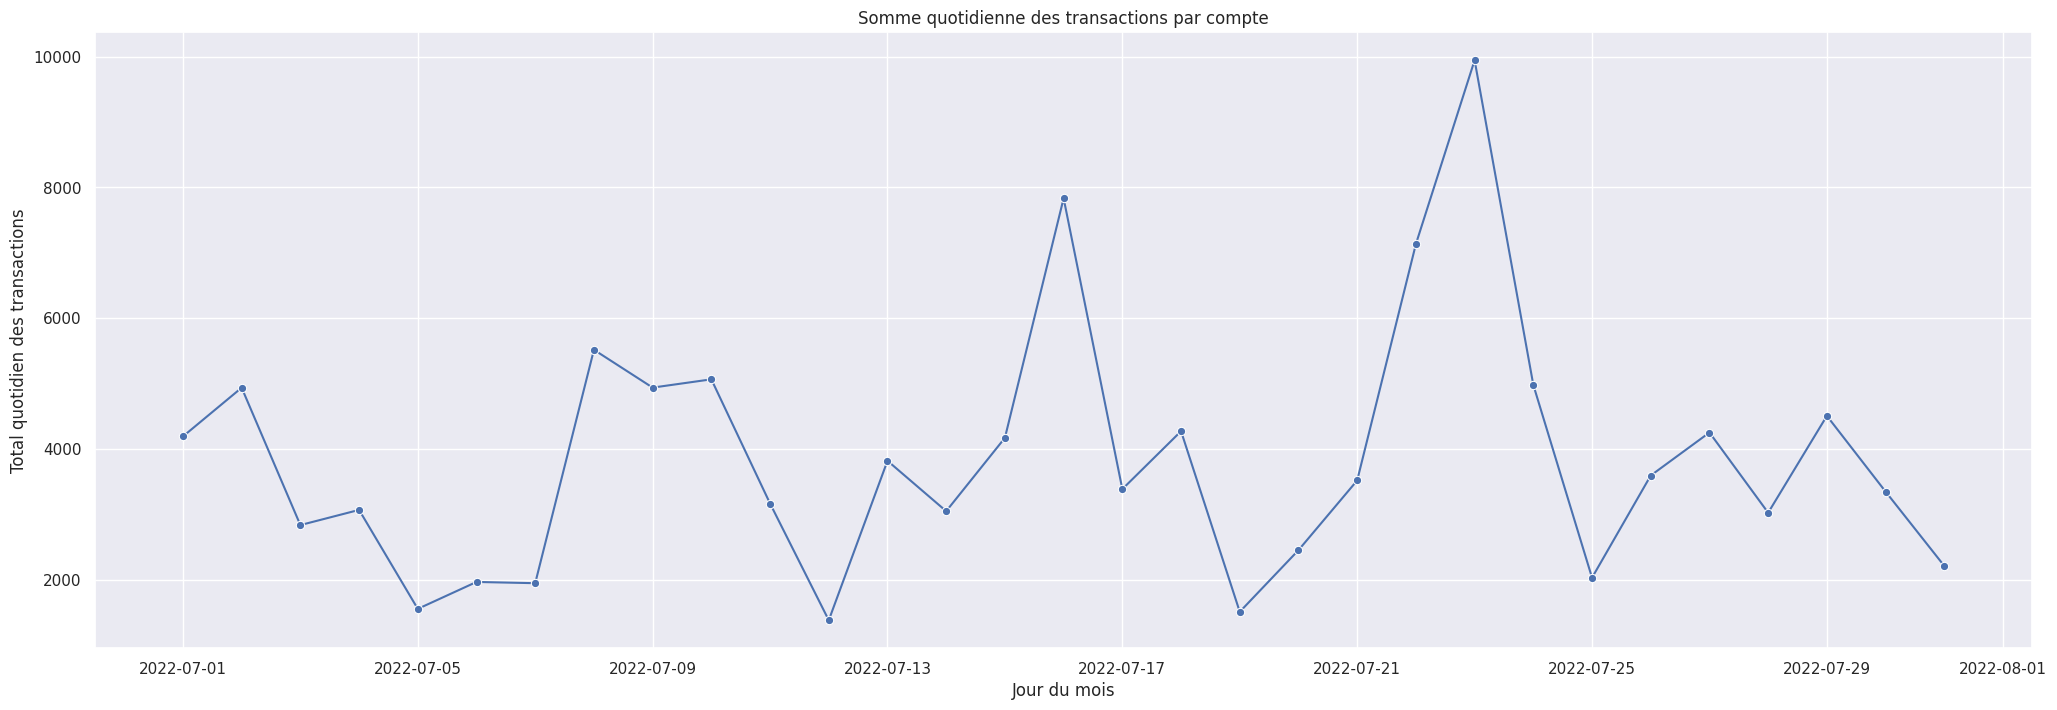

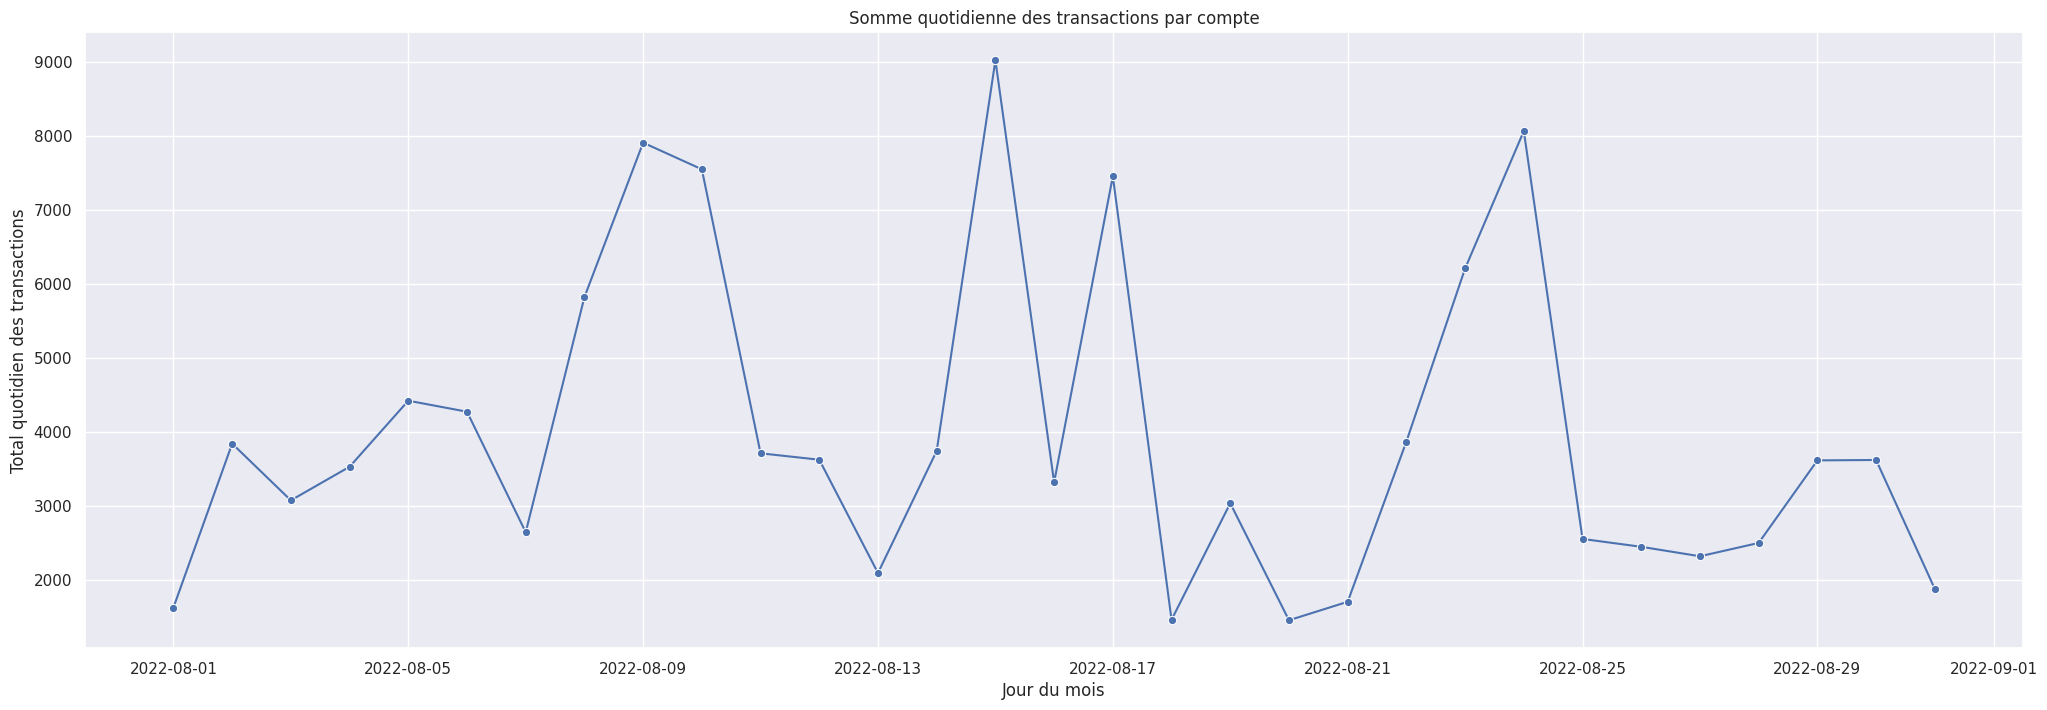

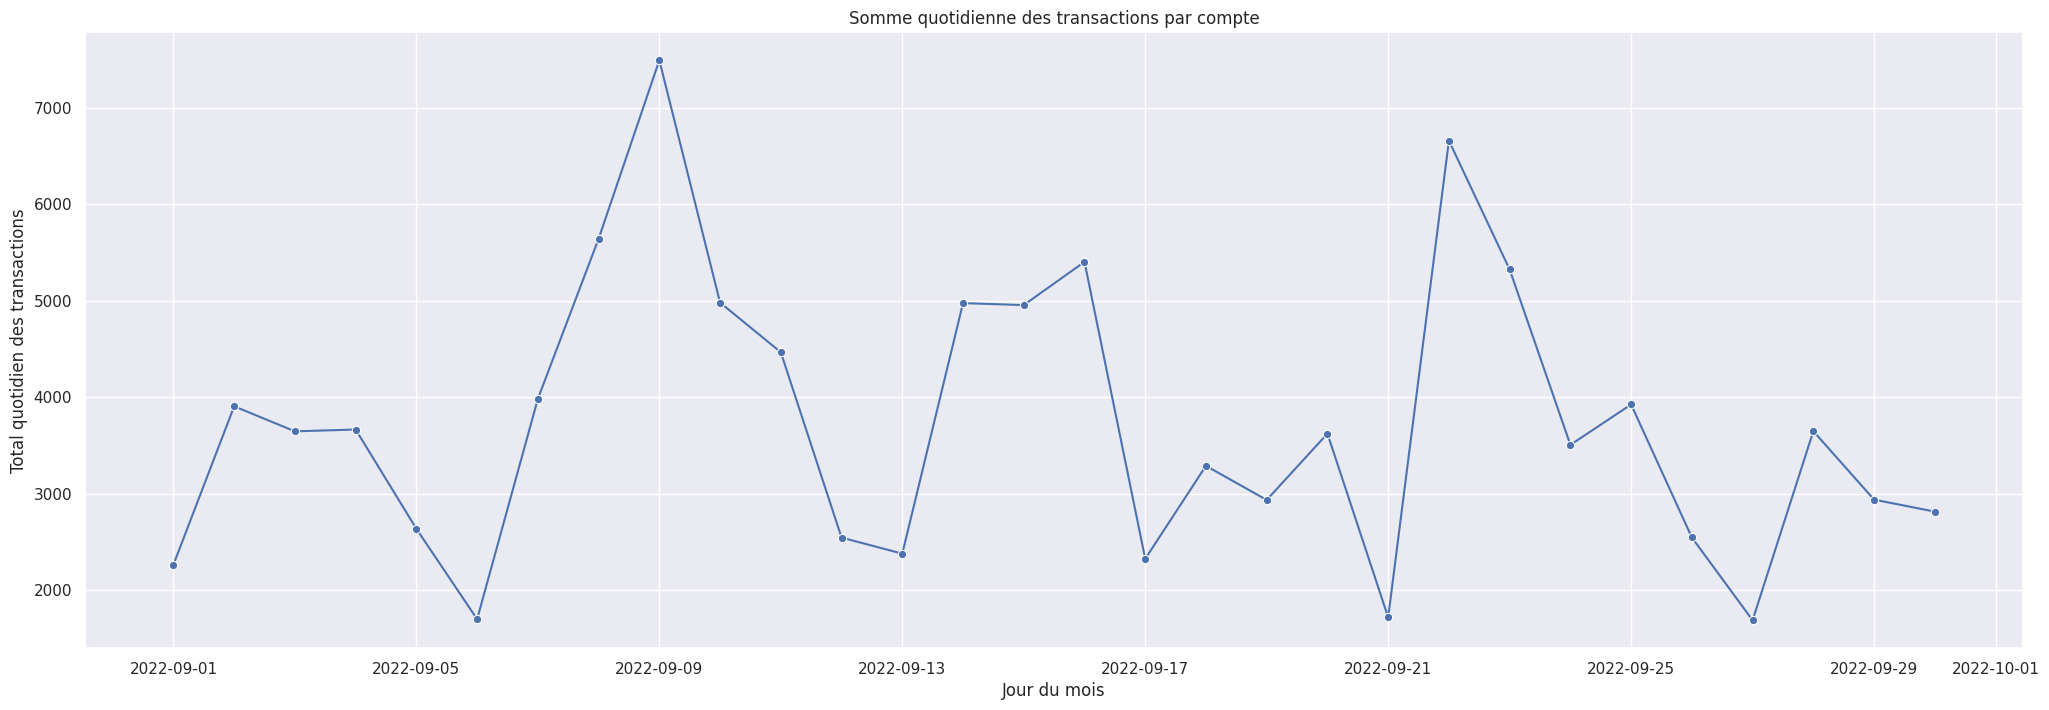

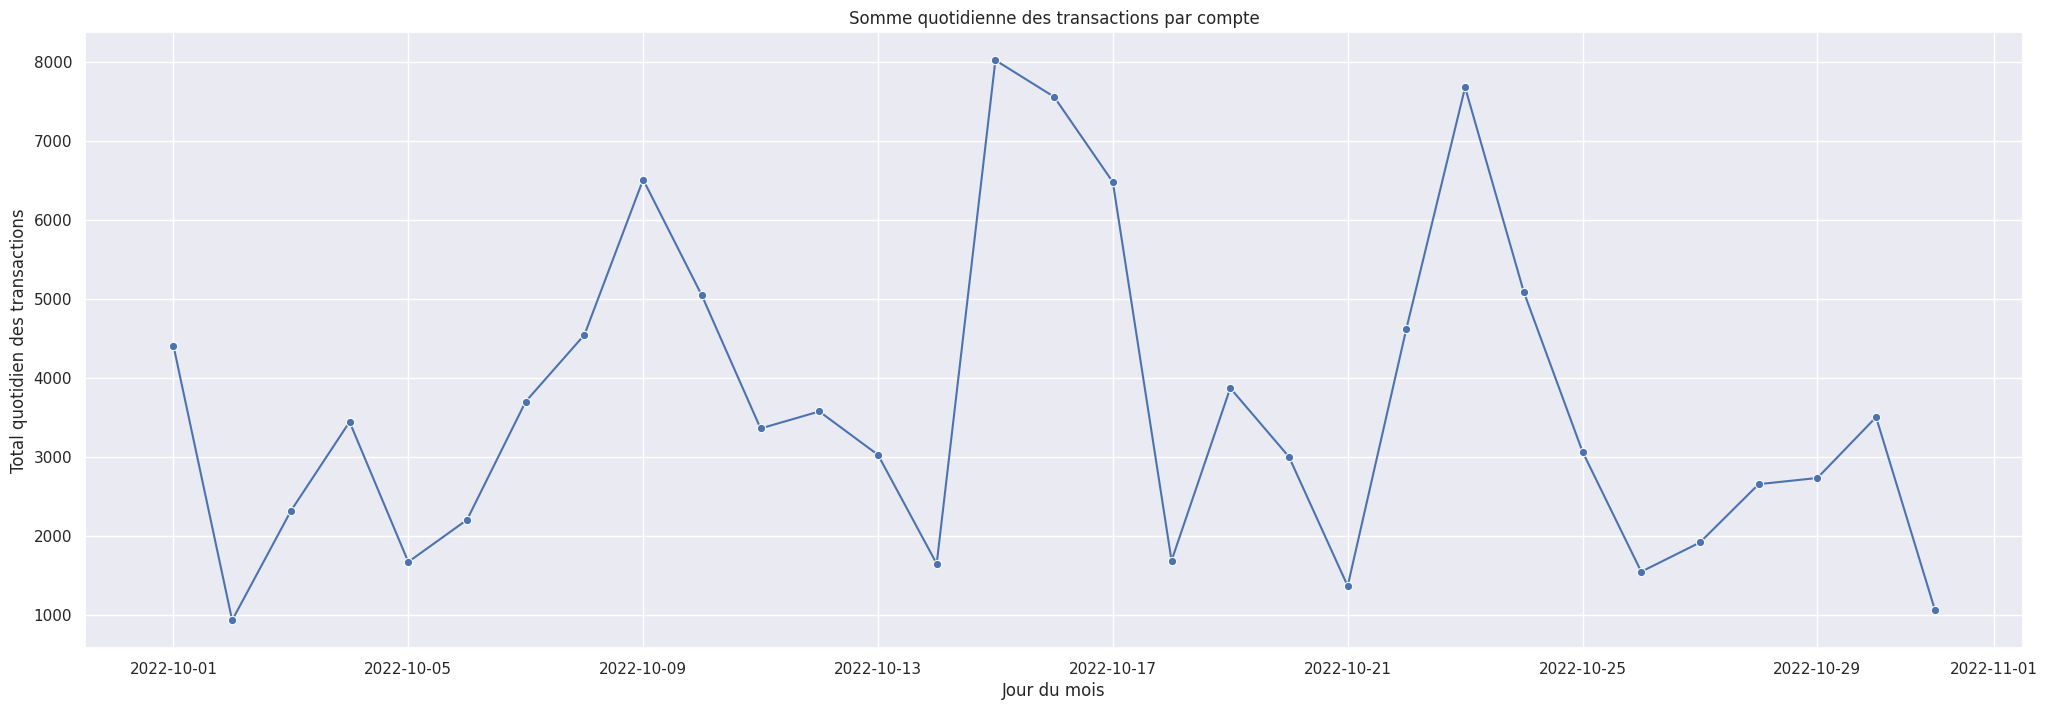

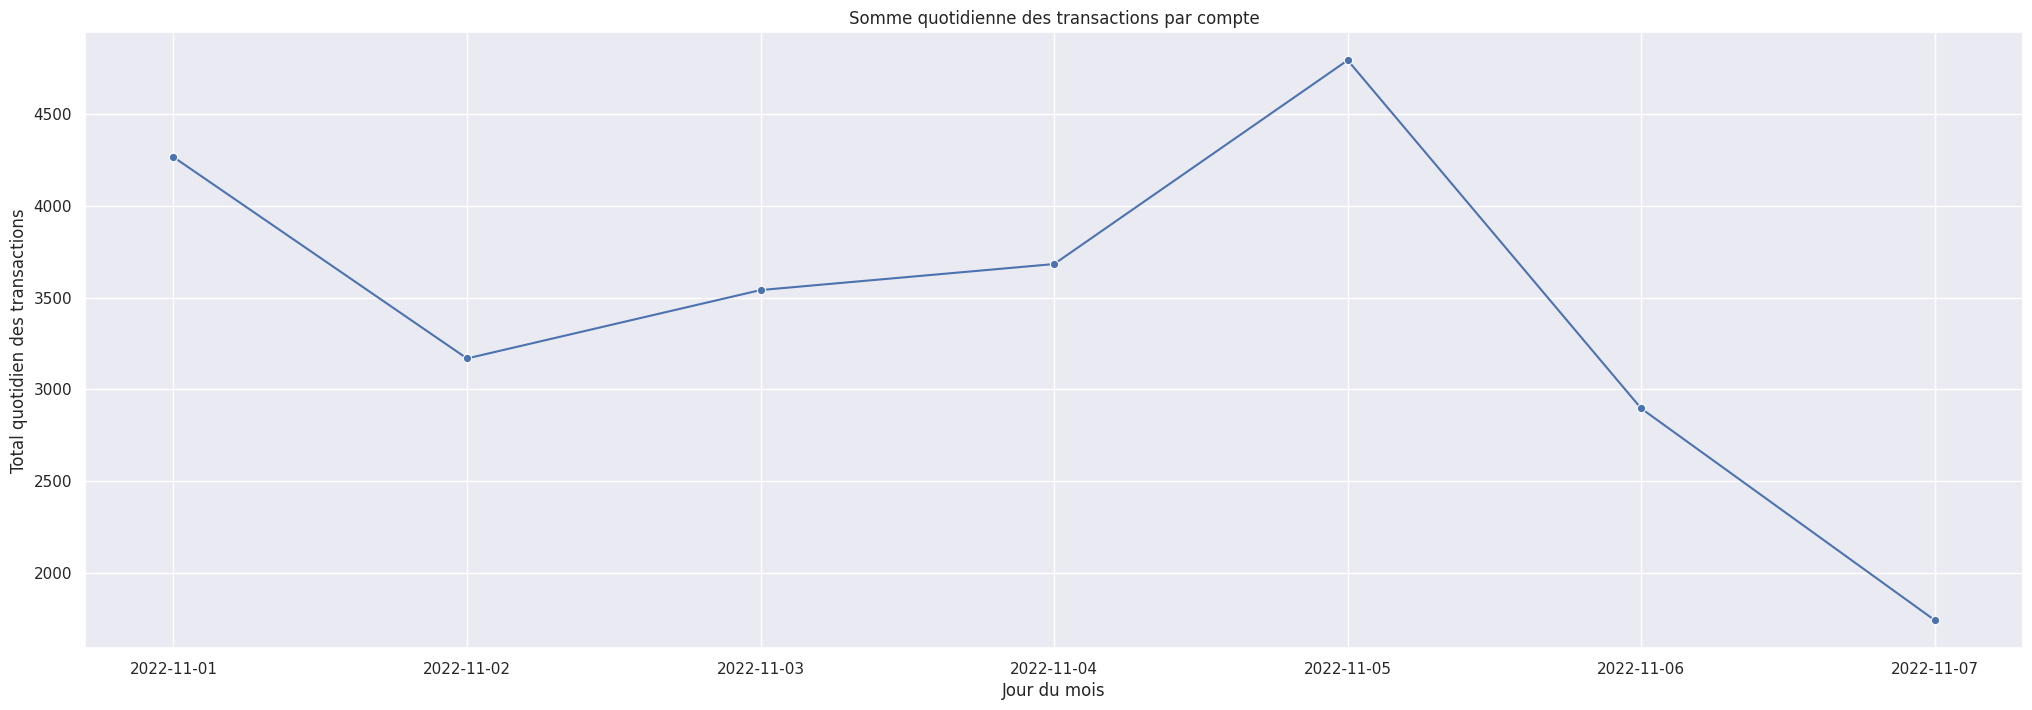

In [ ]:
for i in range(1, 12):
  Daily_trans_firstmonth = Daily_trans[Daily_trans['Month']==i]
  plt.figure(figsize=(25, 8))
  sns.lineplot(data=Daily_trans_firstmonth,x =Daily_trans_firstmonth['Date'] , y='TotalDailyTransaction', marker='o')
  plt.title('Somme quotidienne des transactions par compte')
  plt.xlabel('Jour du mois')
  plt.ylabel('Total quotidien des transactions')
  plt.show()

In [ ]:
colonne_compte = Daily_transaction['Id_compte'].unique()
len(colonne_compte)


12

In [ ]:
for i in colonne_compte:
  print(i)

CPA.1
CPA_MP.1
HP.1
IPA.1
SEW0C_HI.1
SEW0C_LI.1
SEWC_CL.1
SEWC_P.1
SEWC_PA.1
SEWC_P_PL.1
TA.1
US.1


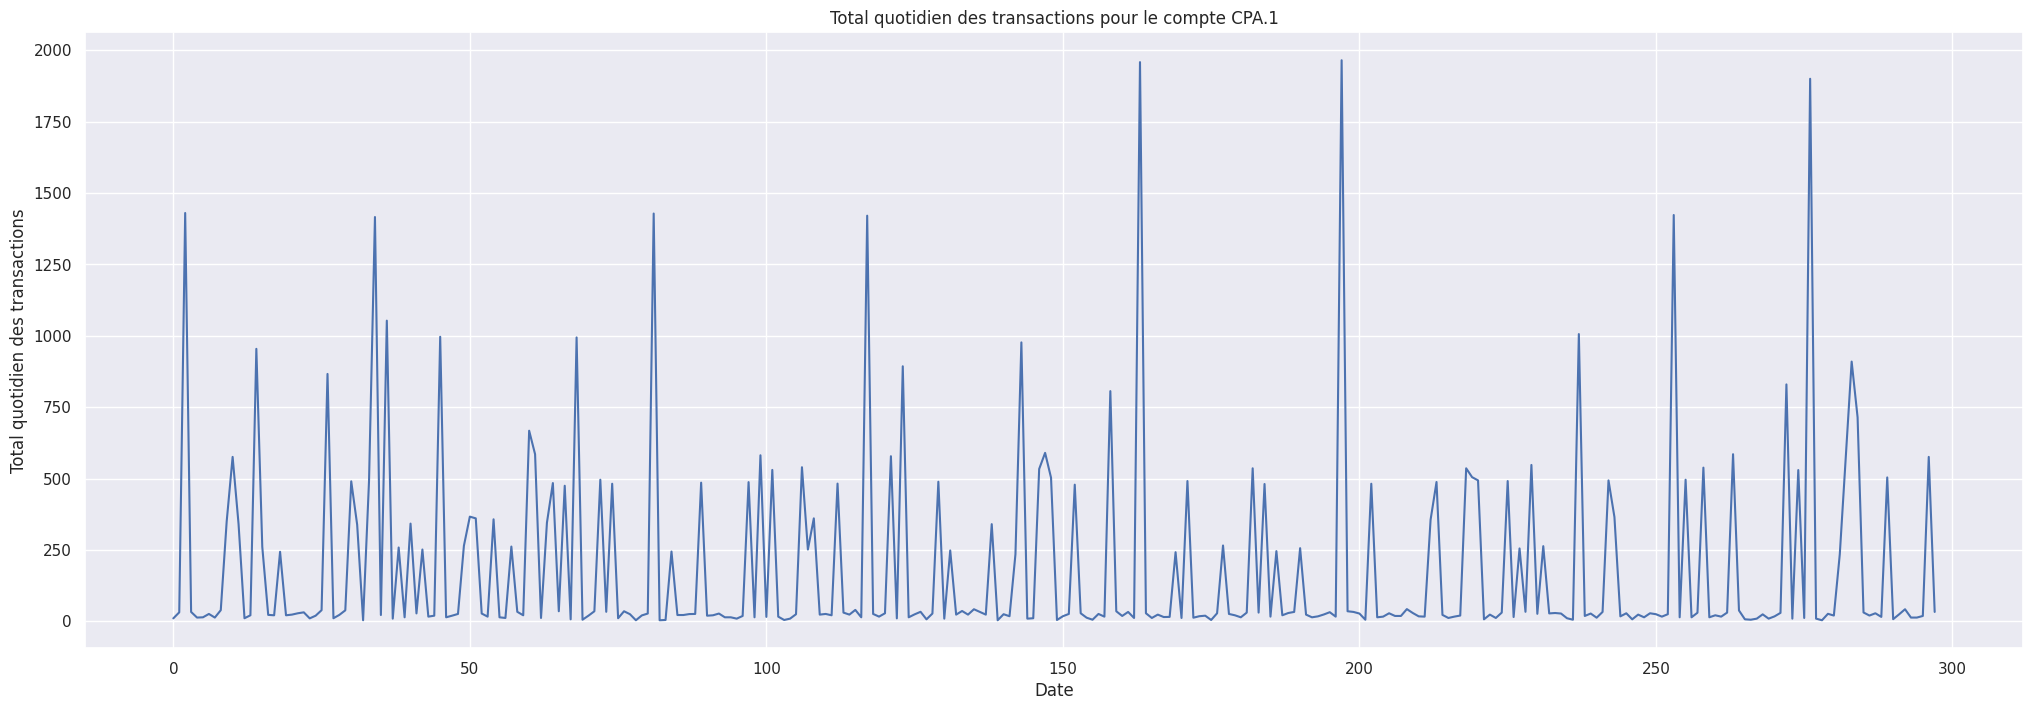

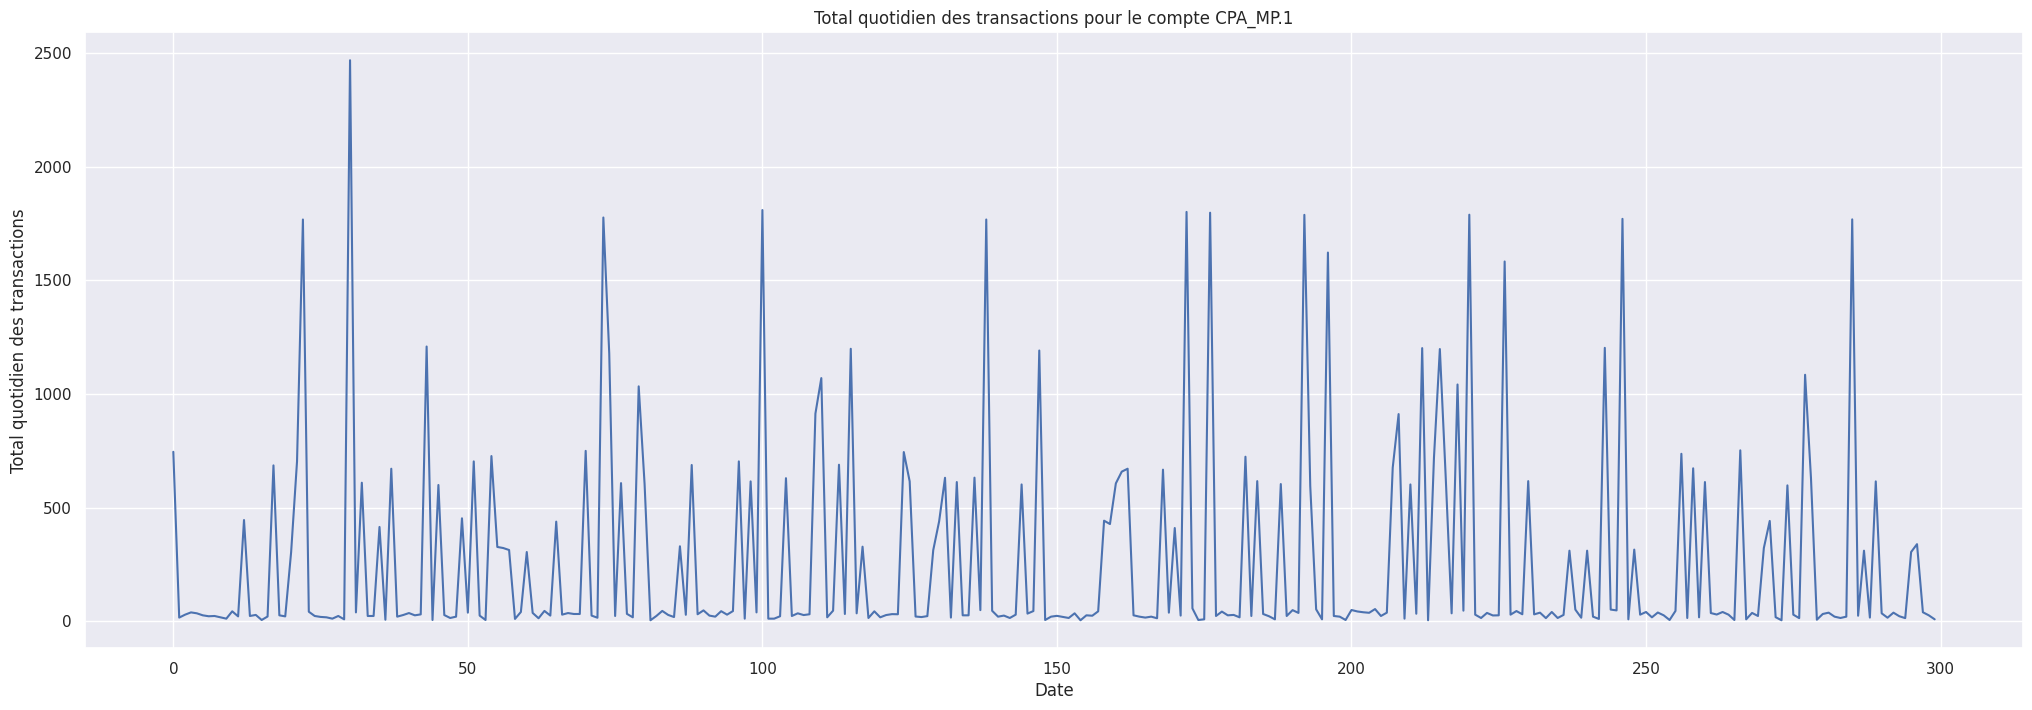

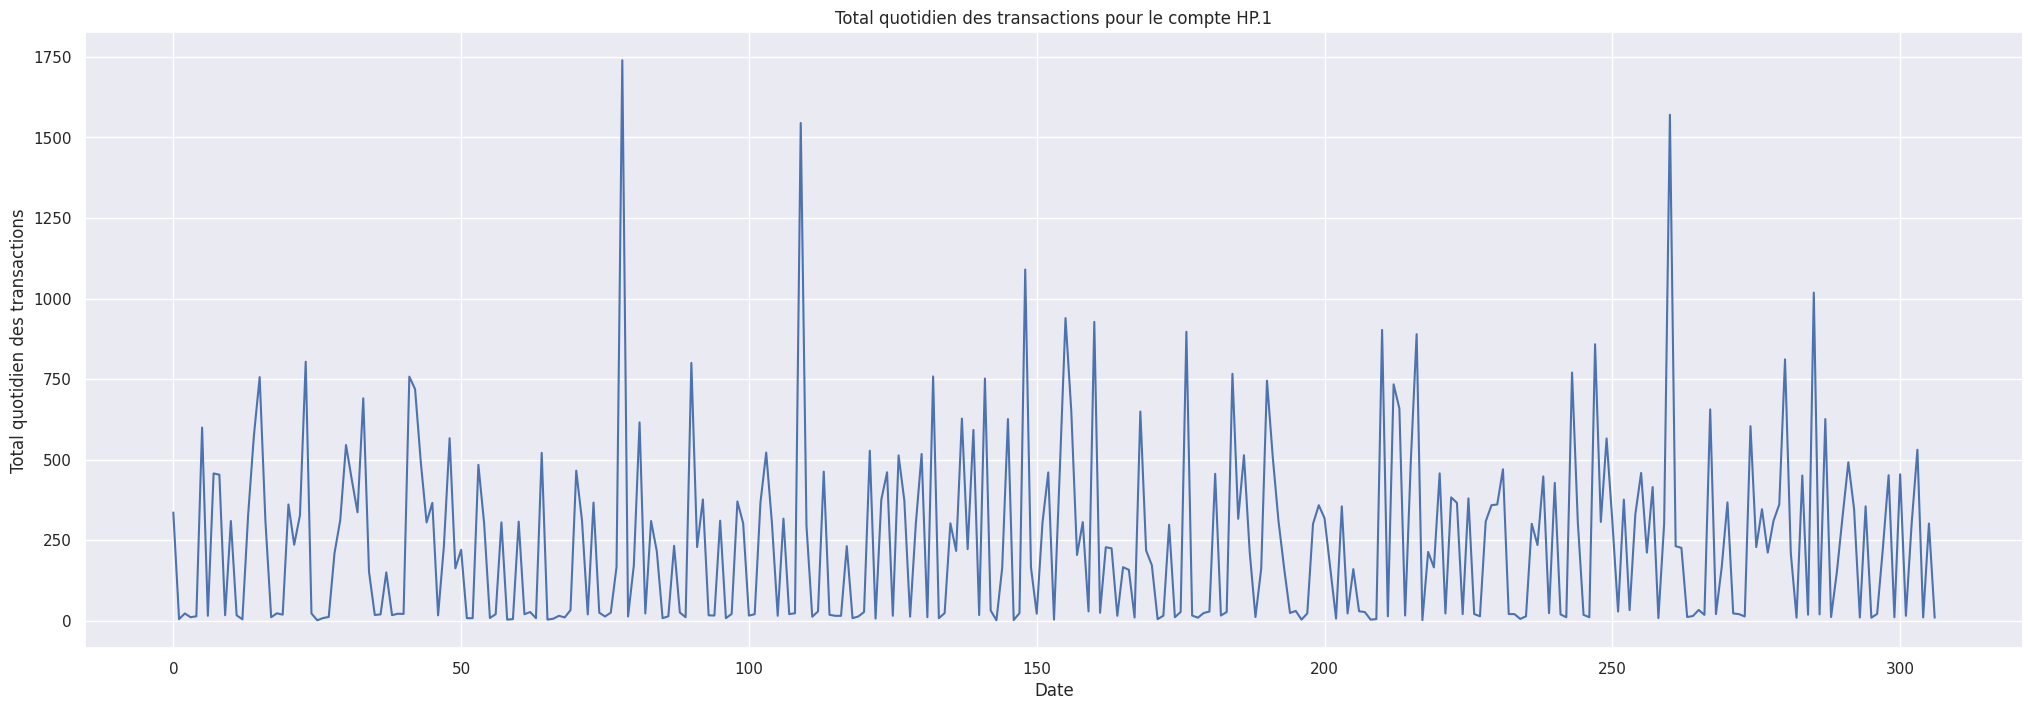

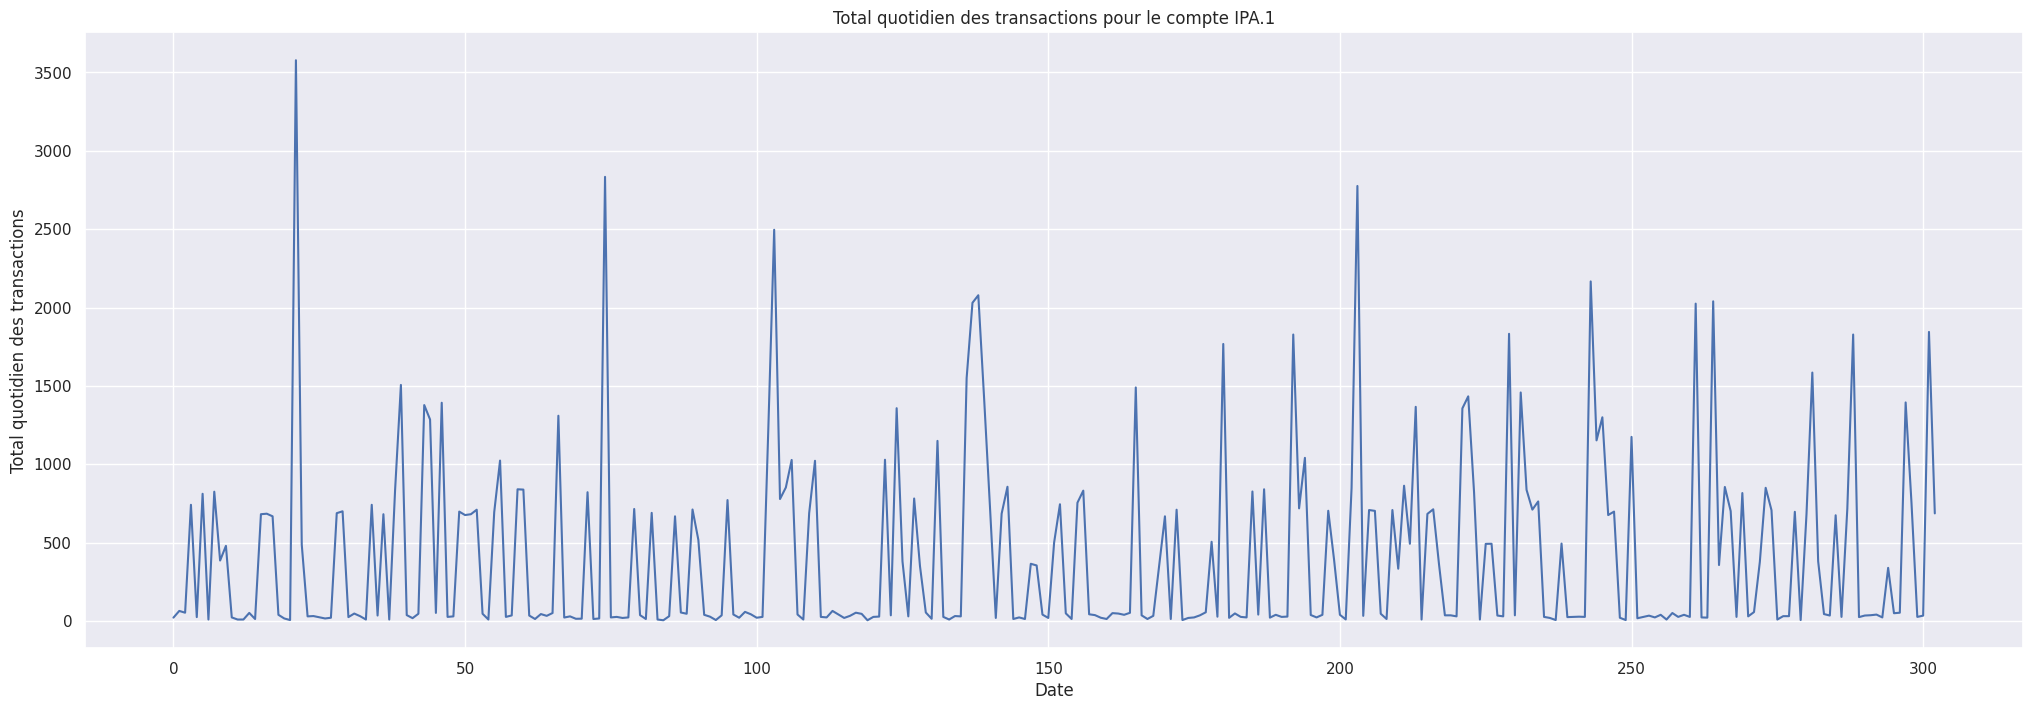

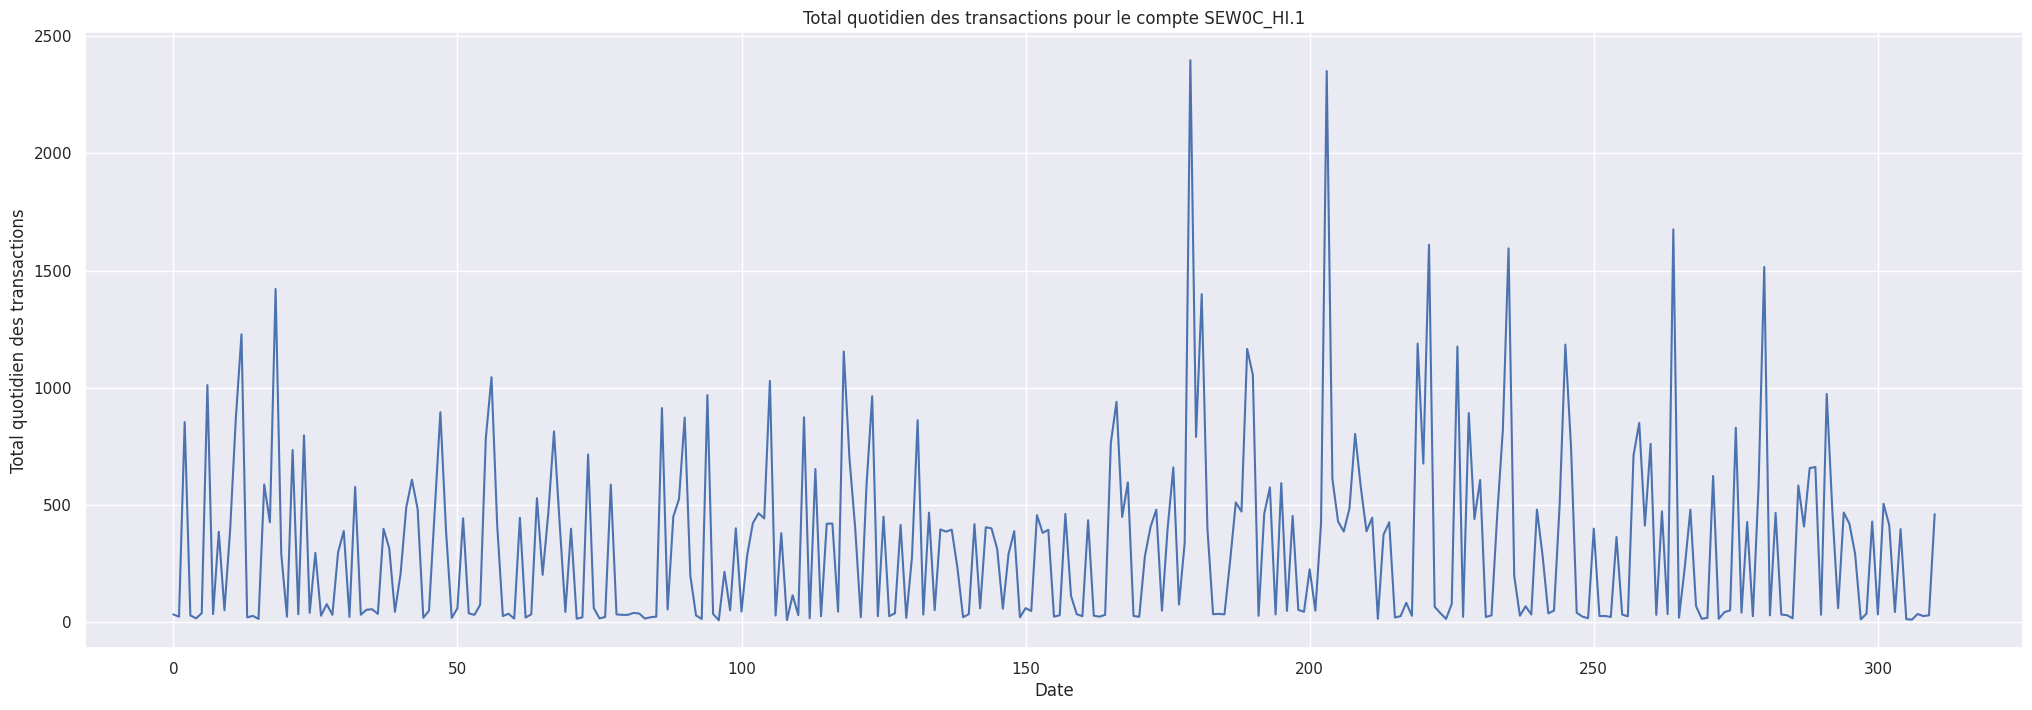

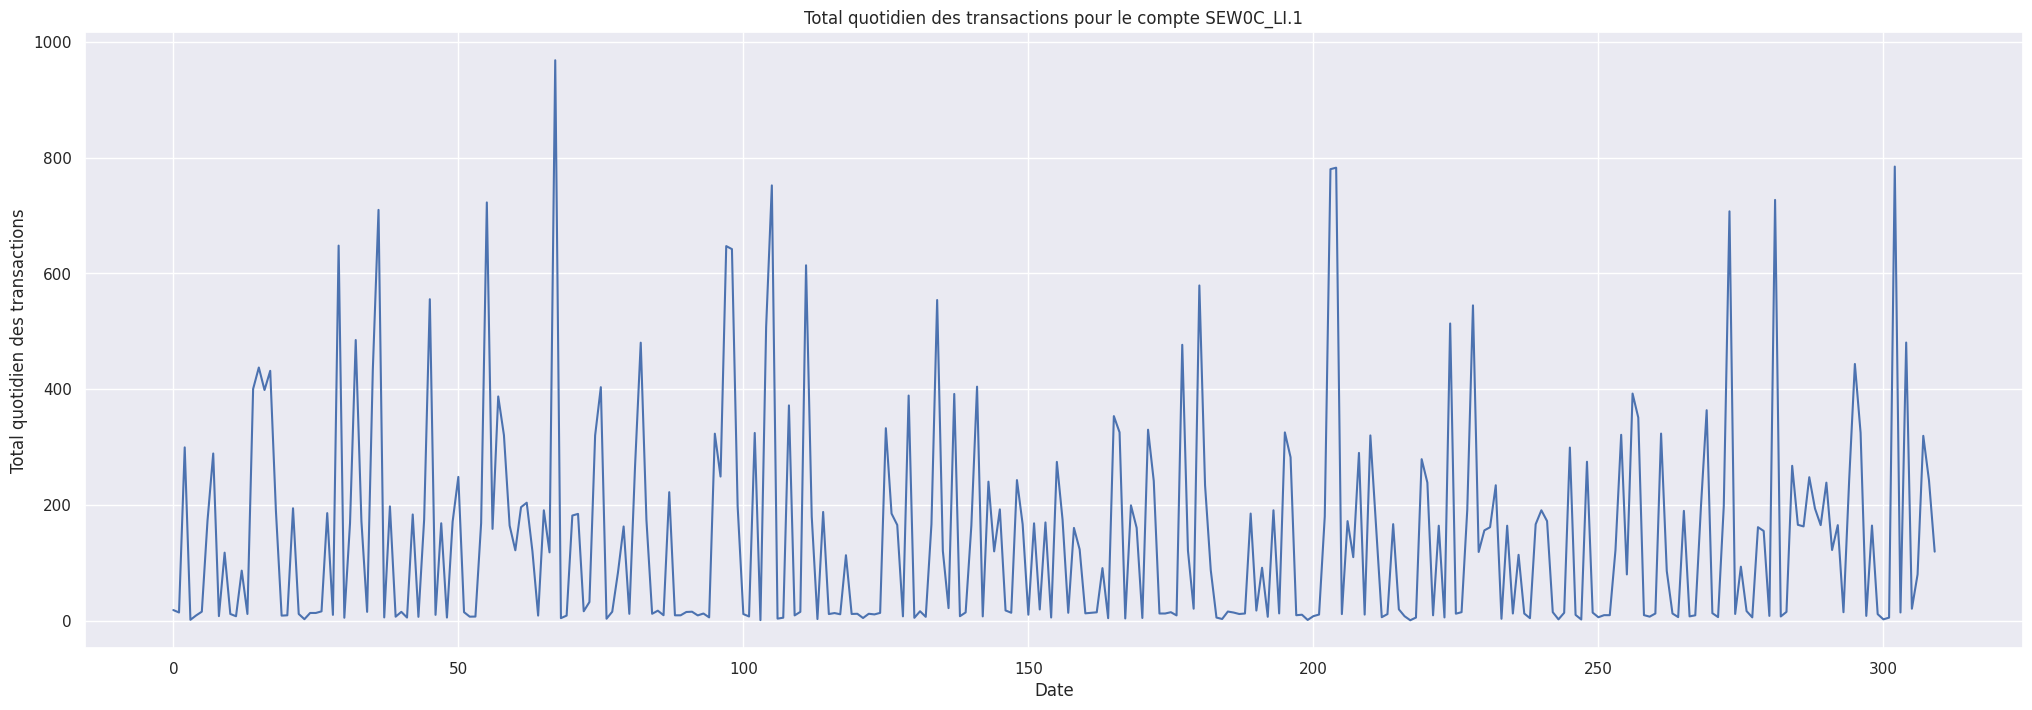

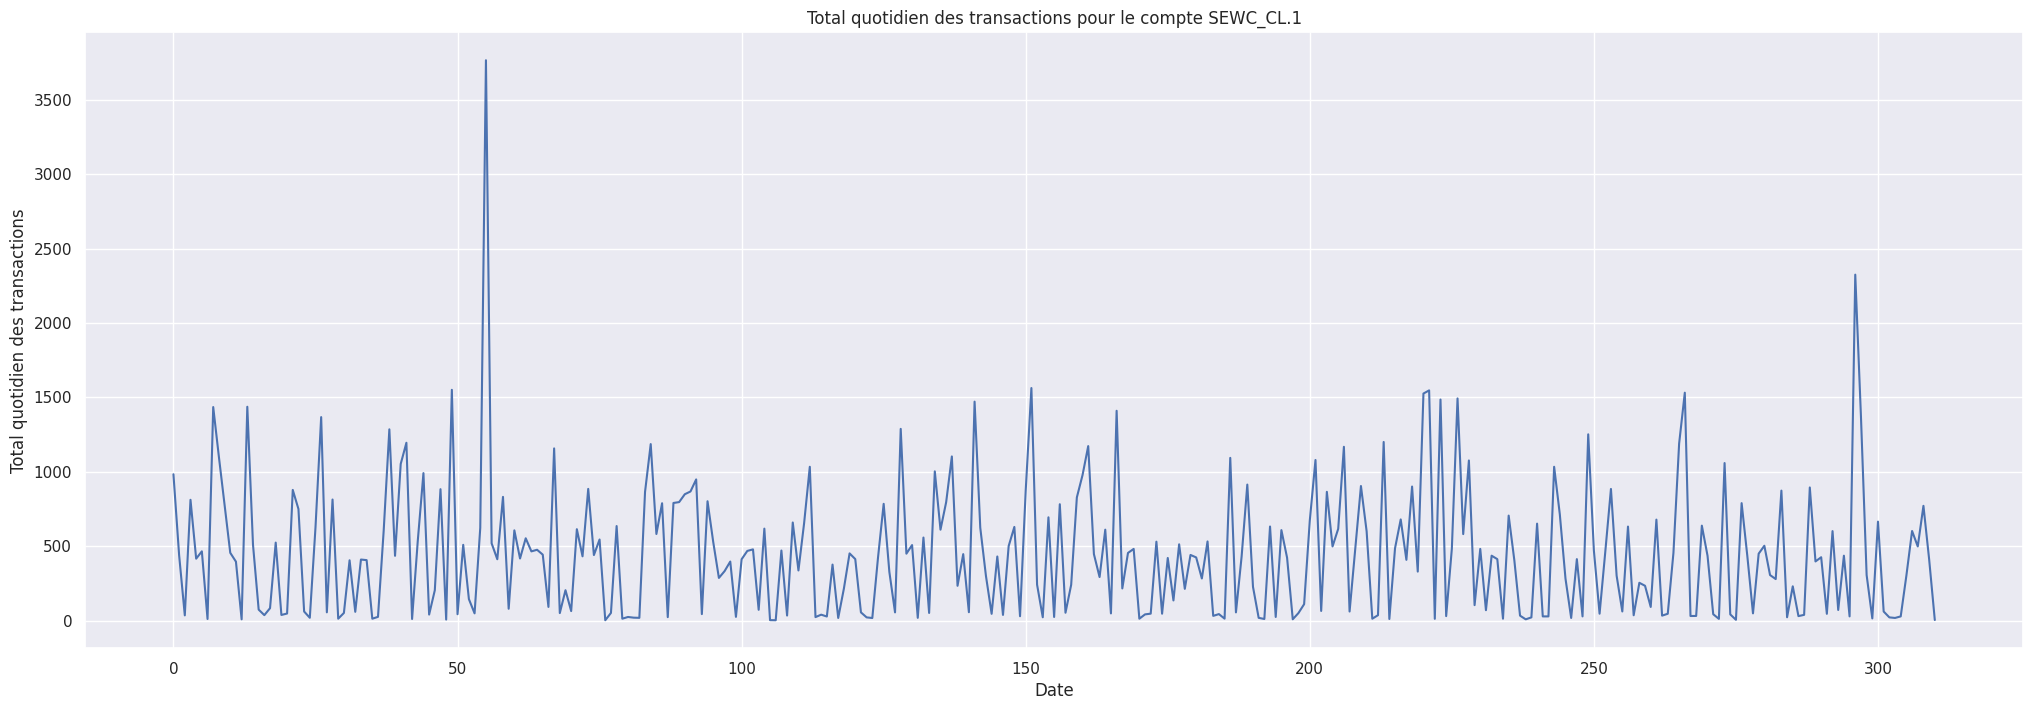

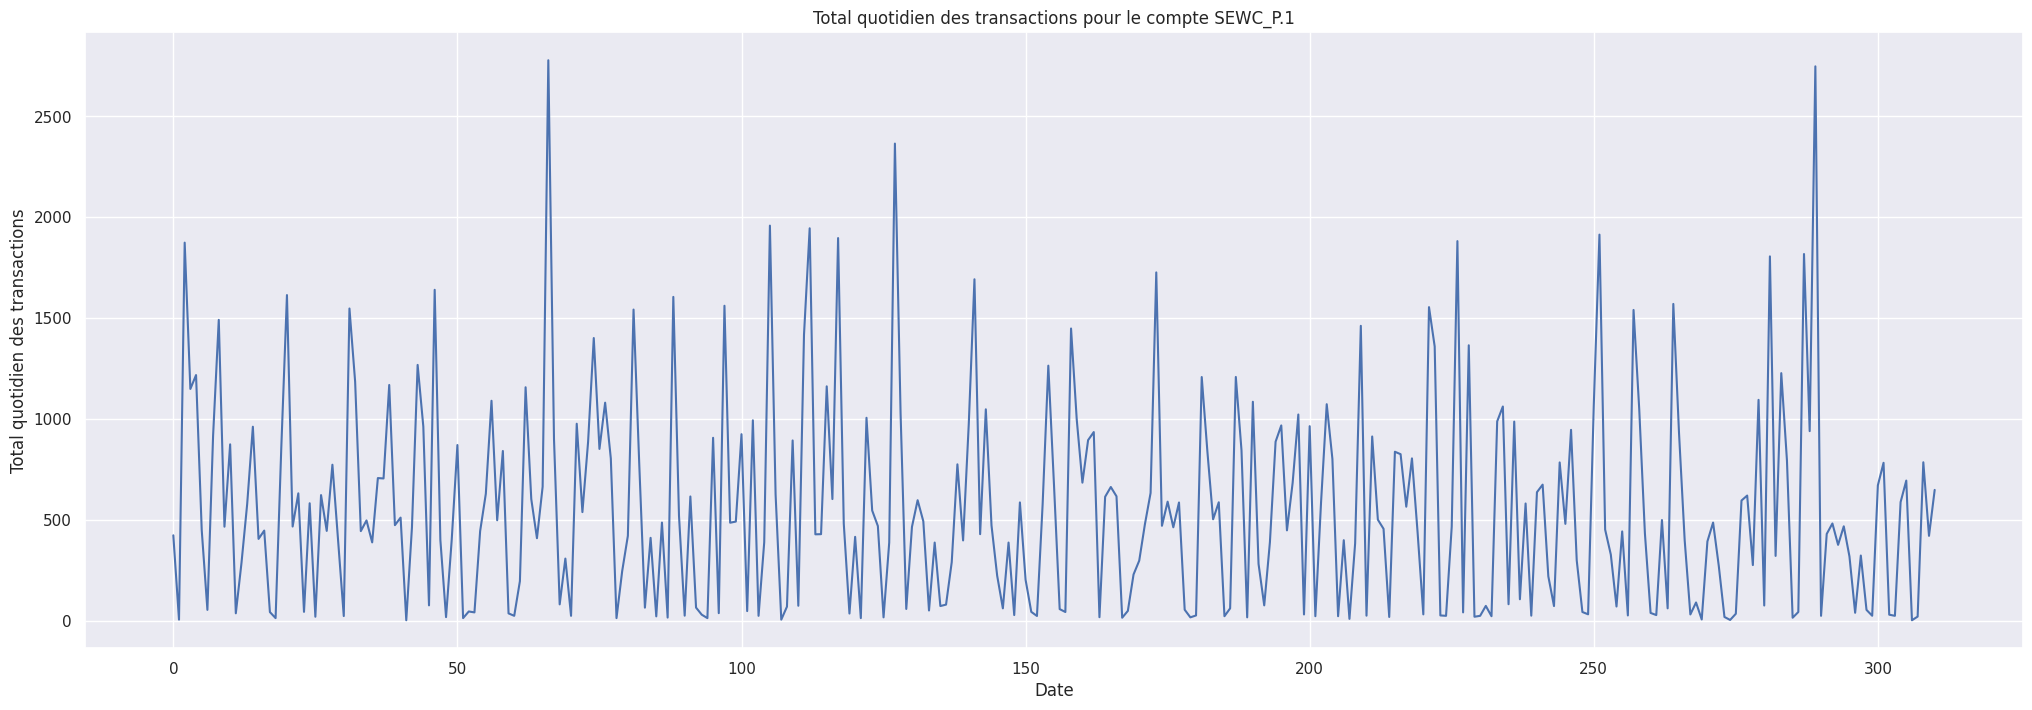

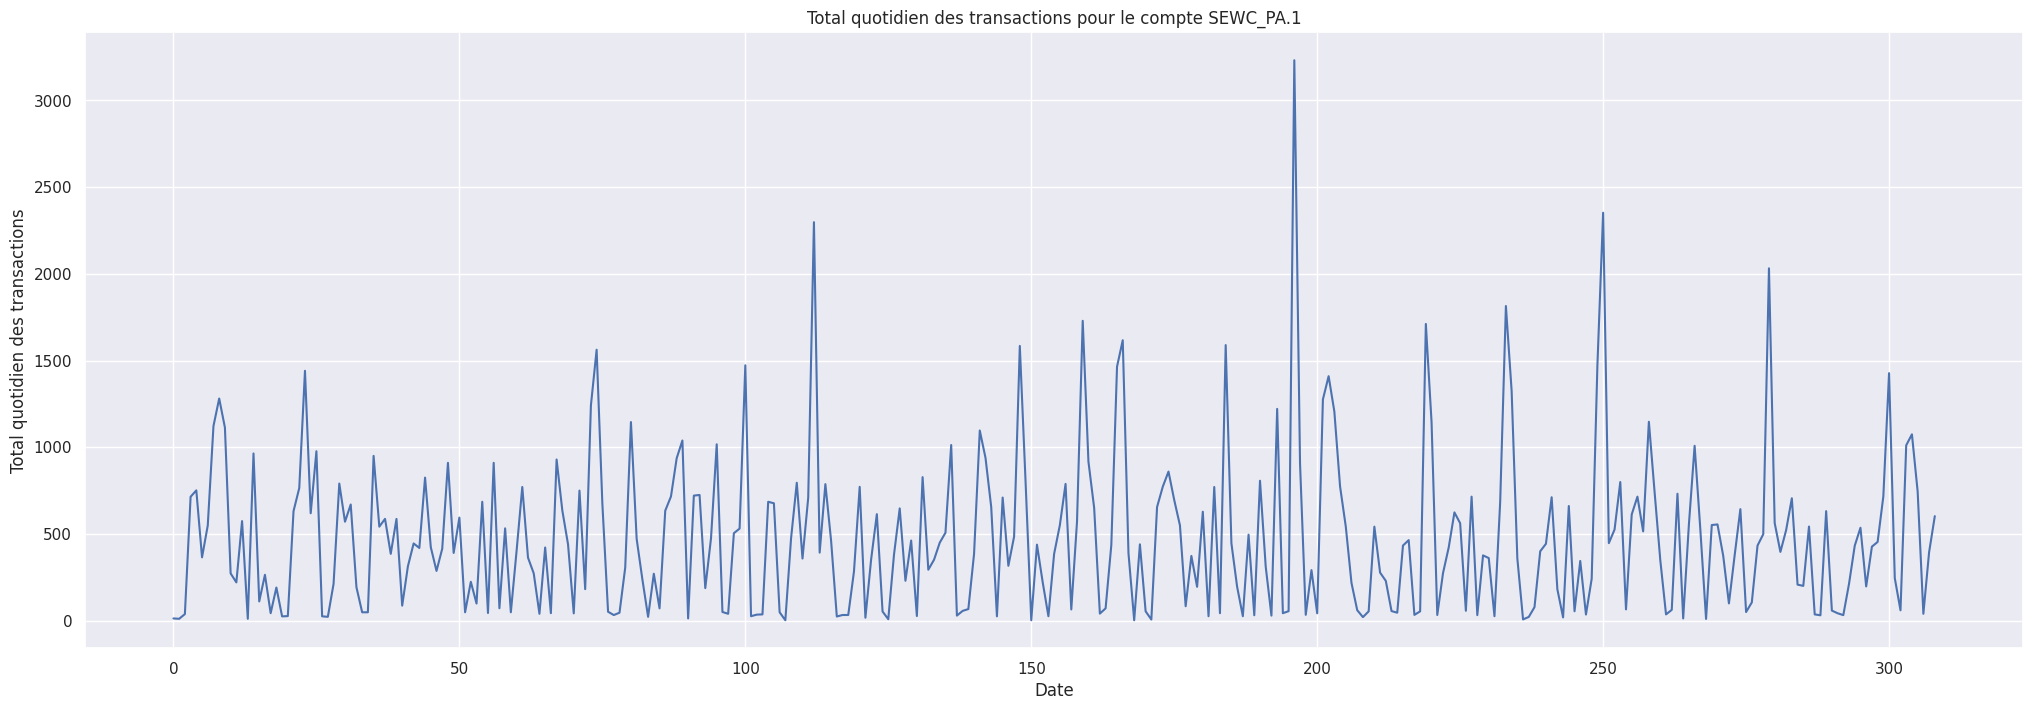

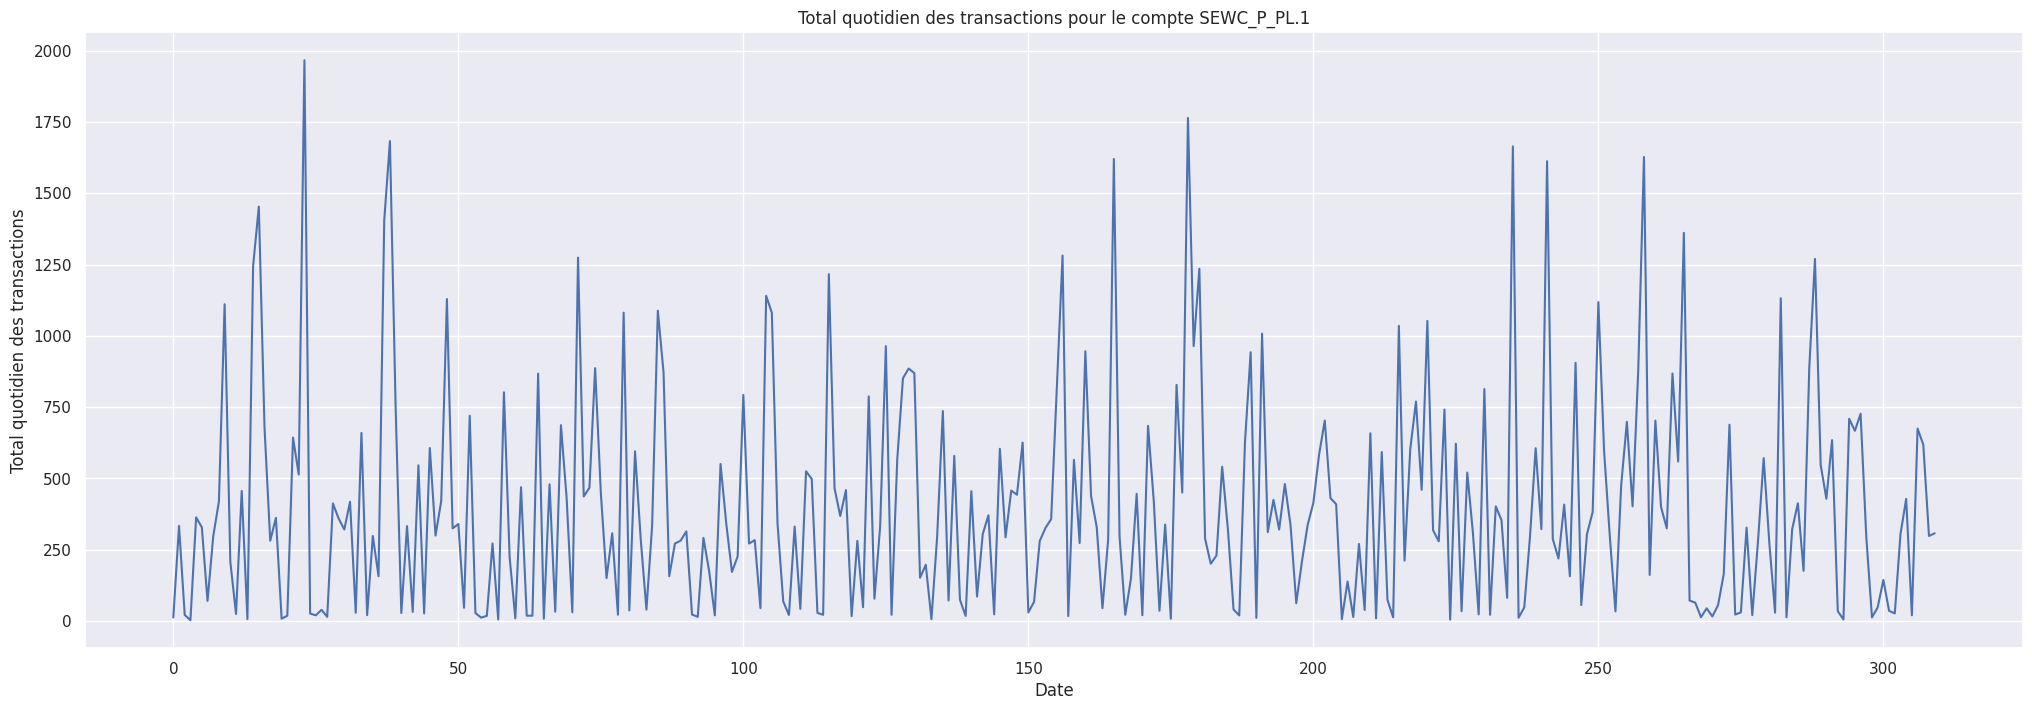

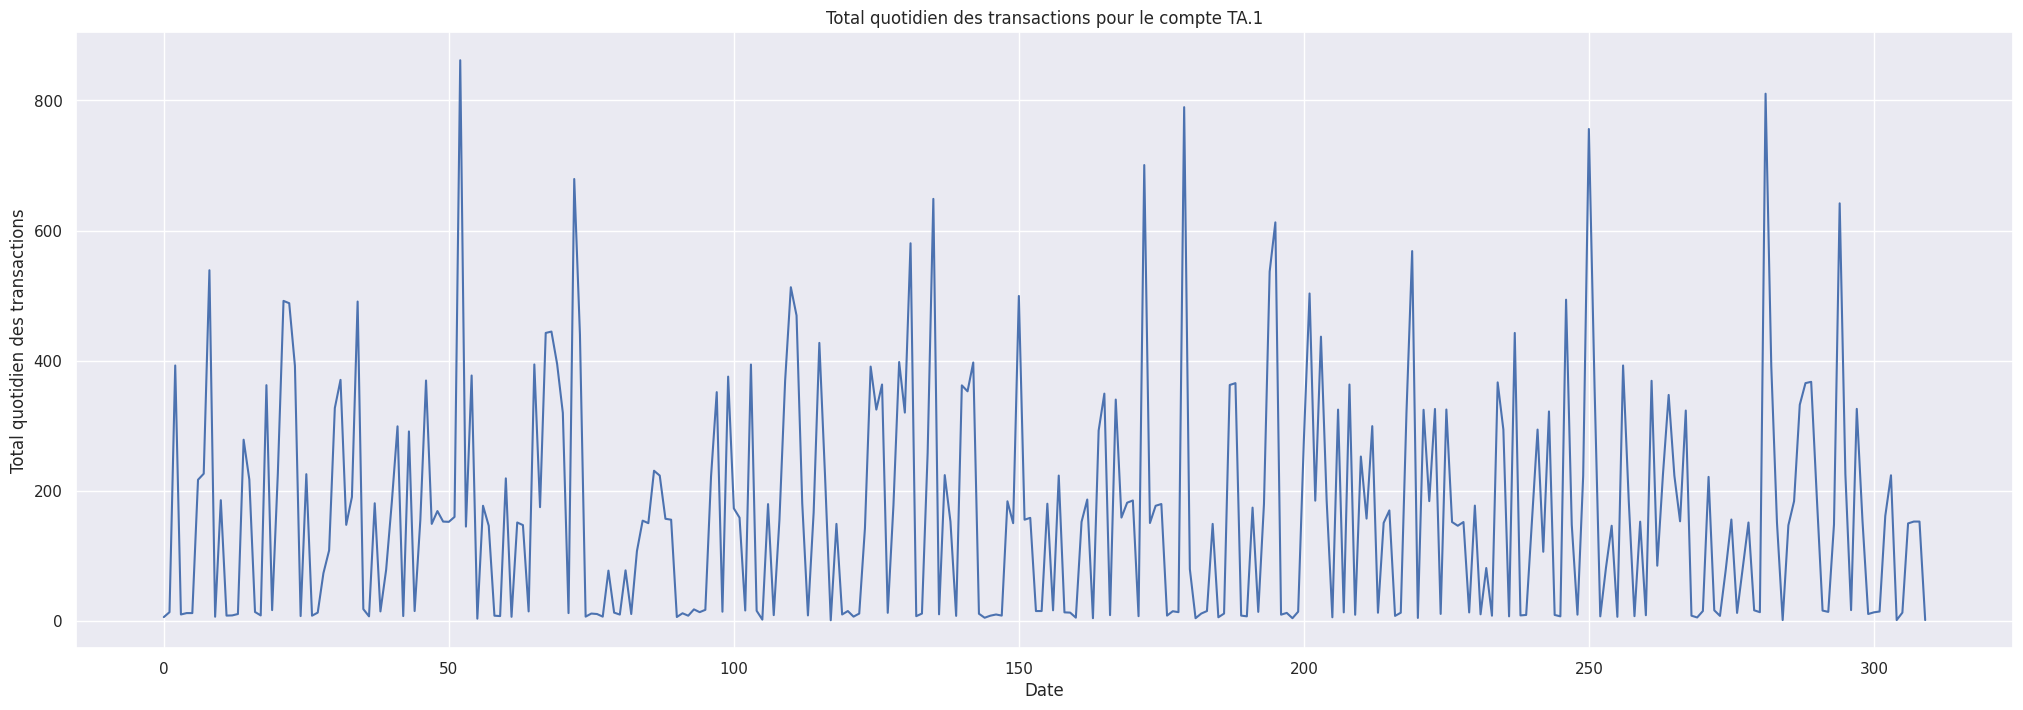

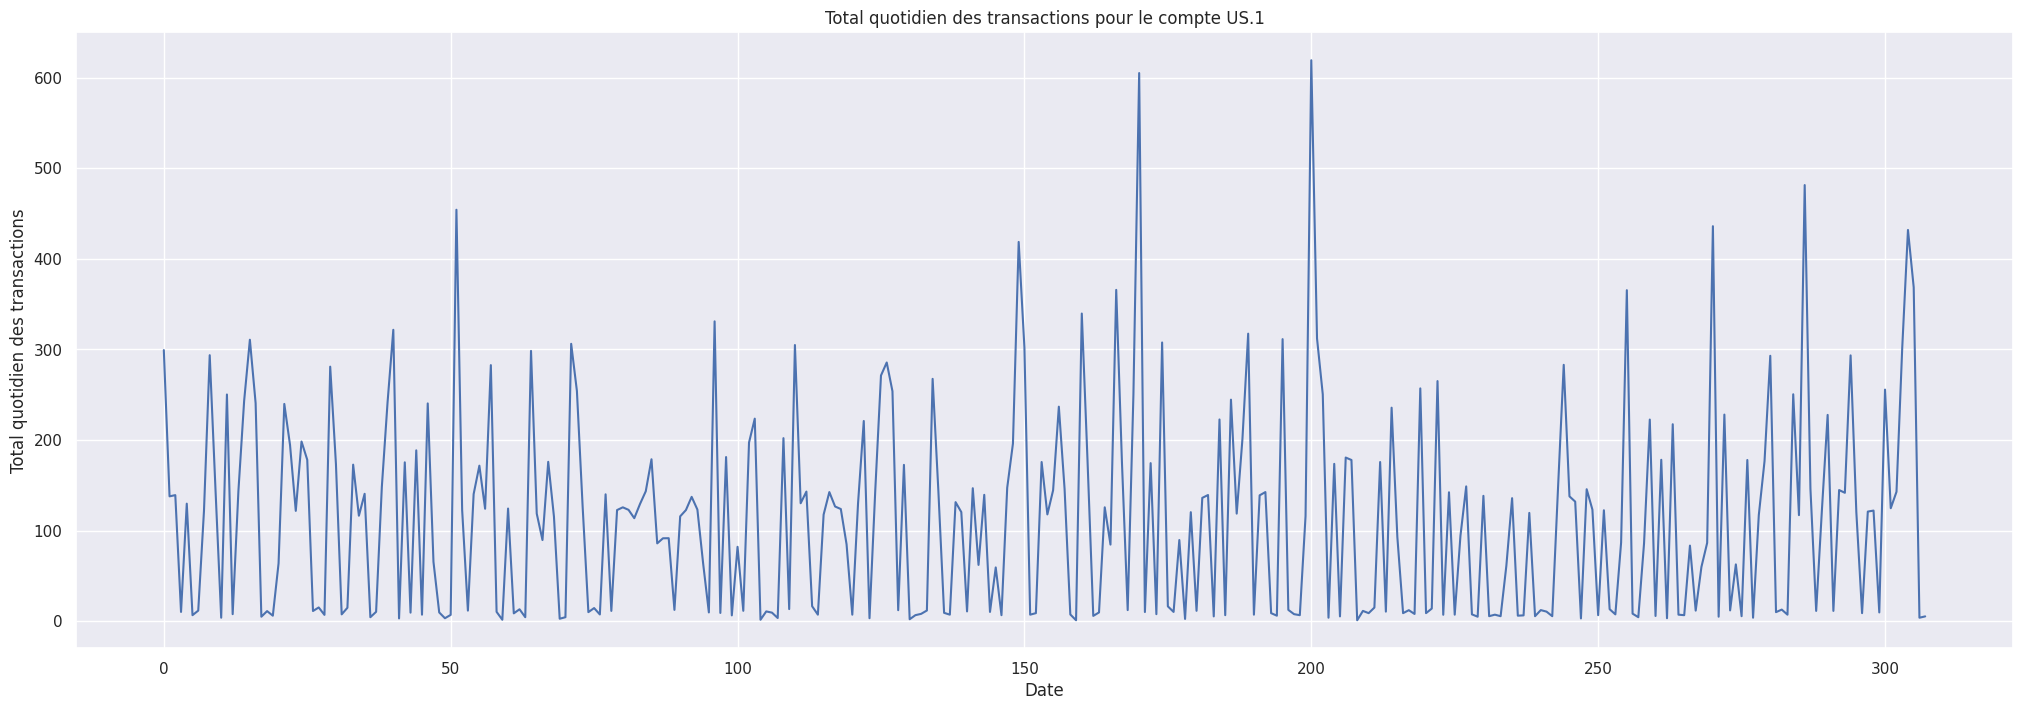

In [ ]:
for i in colonne_compte:
    plt.figure(figsize=(25, 8))
    Daily_transaction_i = data[data['Id_compte'] == i].groupby(['Date'])['amount_transaction'].sum().reset_index(name='TotalDailyTransaction')
    plt.plot(Daily_transaction_i['TotalDailyTransaction'])
    plt.title(f'Total quotidien des transactions pour le compte {i}')
    plt.xlabel('Date')
    plt.ylabel('Total quotidien des transactions')
    plt.show()


In [ ]:
Daily_transaction_i = data[data['Id_compte'] == 'CPA.1'].groupby(['Date'])['amount_transaction'].sum().reset_index(name='Total')
#Daily_transaction_i=Daily_transaction_i[['Date','TotalDailyTransaction']]
#Daily_transaction_i=Daily_transaction_i.set_index('Date')
#Daily_transaction_i = pd.DataFrame(Daily_transaction_i)


In [ ]:
Daily_transaction=Daily_transaction_i.set_index('Date')

In [ ]:
#Daily_transaction.to_csv('CPA_Daily_transaction.csv',  index=False )

In [ ]:
Daily_transaction

Total
Date               
2022-01-01    10.34
2022-01-02    31.49
2022-01-03  1430.34
2022-01-04    32.90
2022-01-06    13.16
...             ...
2022-11-02    13.16
2022-11-03    13.16
2022-11-04    18.80
2022-11-05   575.99
2022-11-06    32.90

[298 rows x 1 columns]

In [ ]:
result1=seasonal_decompose(Daily_transaction, model='multiplicative', period=1)

In [ ]:
print(Daily_transaction_i.dtypes)

Date     datetime64[ns]
Total           float64
dtype: object


In [ ]:
for i in colonne_compte:
    plt.figure(figsize=(25, 8))
    Daily_transaction_i = data[data['Id_compte'] == i].groupby(['Date'])['amount_transaction'].sum().reset_index(name='TotalDailyTransaction')
    #Daily_transaction_i=Daily_transaction_i[['Date','TotalDailyTransaction']]
    Daily_transaction_i = pd.DataFrame(Daily_transaction_i)
    Daily_transaction_i=Daily_transaction_i.set_index('Date')
    #print(Daily_transaction_i.head())
    result1=seasonal_decompose(Daily_transaction_i, period=2)
    # Affichage de chaque composante
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

    ax1.plot(Daily_trans, label='Original')
    ax1.legend(loc='upper left')

    ax2.plot(result1.trend, label='Tendancielle')
    ax2.legend(loc='upper left')

    ax3.plot(result1.seasonal, label='Saisonnière')
    ax3.legend(loc='upper left')

    ax4.plot(result1.resid, label='Résiduelle')
    ax4.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


In [ ]:
# Supposons que vous avez une dataframe 'data' avec vos données
# 'X' représente les caractéristiques, et 'y' représente la variable cible
x = Daily_transaction.drop('TotalDailyTransaction', axis = 1)
y = Daily_transaction['TotalDailyTransaction']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Supposons que vous avez déjà préparé vos données d'entraînement X_train et les étiquettes y_train

# Convertir les données en tenseurs TensorFlow
X_train_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)

# Définir le modèle LSTM
model = Sequential([
    LSTM(50, input_shape=(X_train_tensor.shape[1], 1)),
    Dense(1)
])

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=64)

# Faire des prédictions avec le modèle entraîné
# Supposons que vous avez des données de test X_test
X_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
predictions = model.predict(X_test_tensor)

# Calculer l'erreur (par exemple, l'erreur quadratique moyenne) sur les données de test
test_loss = mean_squared_error(y_test, predictions)
print(f'Test Mean Squared Error (MSE): {test_loss}')


Epoch 1/10
4/4 [==============================] - 3s 6ms/step - loss: 172.2549
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 167.4618
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 162.7858
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 158.2109
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 153.7725
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 149.2708
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 144.8214
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 140.3386
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 135.9634
Epoch 10/10
2/2 [==============================] - 0s 6ms/step
Test Mean Squared Error (MSE): 16823228.52767676


In [ ]:
# Création du modèle
model1 = LinearRegression()

# Ajustement du modèle aux données d'entraînement
model1.fit(x_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model1.predict(x_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Interprétation des coefficients
print('Coefficients:', model1.coef_)
print('Intercept:', model1.intercept_)

Mean Squared Error (MSE): 3513200.4405235588
Coefficients: [-25.8146826   12.58358441]
Intercept: 3711.5551684649613


In [ ]:
Daily_transaction

Month  Day
1      1      2907.32
       10     4878.05
       11     2958.50
       12     2620.67
       13     3461.82
               ...   
9      5      2637.38
       6      1700.96
       7      3983.98
       8      5642.44
       9      7492.39
Name: amount_transaction, Length: 311, dtype: float64

In [ ]:
category_counts = data['category_transaction'].value_counts().reset_index()
category_counts.columns = ['Transaction Category', 'Count']
print(tabulate(category_counts, headers='keys', tablefmt='pretty', showindex=False))

Id_compte = data['Id_compte'].value_counts().reset_index()
Id_compte.columns = ['Id_compte', 'Count']
print(tabulate(Id_compte, headers='keys', tablefmt='pretty', showindex=False))

+-------------------------------------------------------------------+-------+
|                       Transaction Category                        | Count |
+-------------------------------------------------------------------+-------+
|                     Bank Transfers - ATM fees                     | 3729  |
|                 Transportation - Public Transport                 | 3102  |
|                     Transportation - Parking                      | 2569  |
|                 Bank Transfers - ATM withdrawals                  | 2195  |
|                   Food & Drink - Coffee and tea                   | 2163  |
|                  Food & Drink - Vending machines                  | 1214  |
|                 Bank Transfers - Other bank fees                  |  952  |
|               Medical - Pharmacies and supplements                |  544  |
|                Transportation-Taxis and rideshares                |  398  |
|                      Transportation - Tolls                   

In [ ]:
# @title Clean dataset
data_brut1 = data[['Date', 'Id_compte','amount_transaction','category_transaction']]

In [ ]:
# Utilisez get_dummies pour créer une DataFrame avec des colonnes indicatrices
df_with_dummies = pd.get_dummies(data['Id_compte'])
#df_with_dummies1 = pd.get_dummies(data['category_transaction'])
# Concaténez la DataFrame d'origine avec la nouvelle DataFrame
clean_data = pd.concat([data_brut1, df_with_dummies], axis=1)
clean_data = clean_data.sort_values(by=['Date'])

In [ ]:
clean_data.to_csv('clean_data.csv', index=False)

In [ ]:
clean_data

Date   Id_compte  amount_transaction  \
0     2022-01-01 00:23:00   SEWC_CL.1              462.96   
1     2022-01-01 00:26:00  SEW0C_LI.1               15.51   
2     2022-01-01 01:01:00        US.1                2.24   
3     2022-01-01 01:21:00        TA.1                2.86   
4     2022-01-01 01:54:00        US.1                1.68   
...                   ...         ...                 ...   
20406 2022-11-07 05:42:00    SEWC_P.1              264.60   
20407 2022-11-07 05:56:00   SEWC_CL.1                4.63   
20408 2022-11-07 06:36:00   SEWC_PA.1                6.96   
20409 2022-11-07 06:37:00  SEW0C_HI.1              448.44   
20410 2022-11-07 06:48:00  SEW0C_HI.1                7.47   

                               category_transaction  CPA.1  CPA_MP.1  HP.1  \
0                          Food & Drink - Groceries      0         0     0   
1      General Services - Home Repair + Maintenance      0         0     0   
2                  Bank Transfers - ATM withdrawals      0         0     0   
3                 Transportation - Public Transport      0         0     0   
4                  Bank Transfers - ATM withdrawals      0         0     0   
...                                             ...    ...       ...   ...   
20406          Medical - Pharmacies and supplements      0         0     0   
20407                     Bank Transfers - ATM fees      0         0     0   
20408                      Transportation - Parking      0         0     0   
20409                         Subscription - Others      0         0     0   
20410              Bank Transfers - ATM withdrawals      0         0     0   

       IPA.1  SEW0C_HI.1  SEW0C_LI.1  SEWC_CL.1  SEWC_P.1  SEWC_PA.1  \
0          0           0           0          1         0          0   
1          0           0           1          0         0          0   
2          0           0           0          0         0          0   
3          0           0           0          0         0          0   
4          0           0           0          0         0          0   
...      ...         ...         ...        ...       ...        ...   
20406      0           0           0          0         1          0   
20407      0           0           0          1         0          0   
20408      0           0           0          0         0          1   
20409      0           1           0          0         0          0   
20410      0           1           0          0         0          0   

       SEWC_P_PL.1  TA.1  US.1  
0                0     0     0  
1                0     0     0  
2                0     0     1  
3                0     1     0  
4                0     0     1  
...            ...   ...   ...  
20406            0     0     0  
20407            0     0     0  
20408            0     0     0  
20409            0     0     0  
20410            0     0     0  

[20411 rows x 16 columns]

In [ ]:
clean_data.describe()

amount_transaction         CPA.1      CPA_MP.1          HP.1  \
count        20411.000000  20411.000000  20411.000000  20411.000000   
mean            56.955119      0.049238      0.051247      0.073588   
std            150.401661      0.216370      0.220506      0.261105   
min              0.230000      0.000000      0.000000      0.000000   
25%              2.790000      0.000000      0.000000      0.000000   
50%              4.700000      0.000000      0.000000      0.000000   
75%              8.790000      0.000000      0.000000      0.000000   
max           2005.200000      1.000000      1.000000      1.000000   

              IPA.1    SEW0C_HI.1    SEW0C_LI.1     SEWC_CL.1      SEWC_P.1  \
count  20411.000000  20411.000000  20411.000000  20411.000000  20411.000000   
mean       0.053501      0.105972      0.097692      0.090343      0.097937   
std        0.225035      0.307810      0.296906      0.286680      0.297237   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          SEWC_PA.1   SEWC_P_PL.1          TA.1          US.1  
count  20411.000000  20411.000000  20411.000000  20411.000000  
mean       0.102543      0.097447      0.090392      0.090098  
std        0.303368      0.296573      0.286750      0.286330  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000

In [ ]:
# @title Petite vérification
# Comptez le nombre de 1 et de 0 dans la colonne 'A'
count_ones = clean_data['CPA.1'].sum()
count_zeros = len(clean_data) - count_ones

# Affichez les résultats
print(f"Nombre de 1 dans la colonne 'CPA.1': {count_ones}")
print(f"Nombre de 0 dans la colonne 'CPA.1': {count_zeros}")

Nombre de 1 dans la colonne 'CPA.1': 1005
Nombre de 0 dans la colonne 'CPA.1': 19406


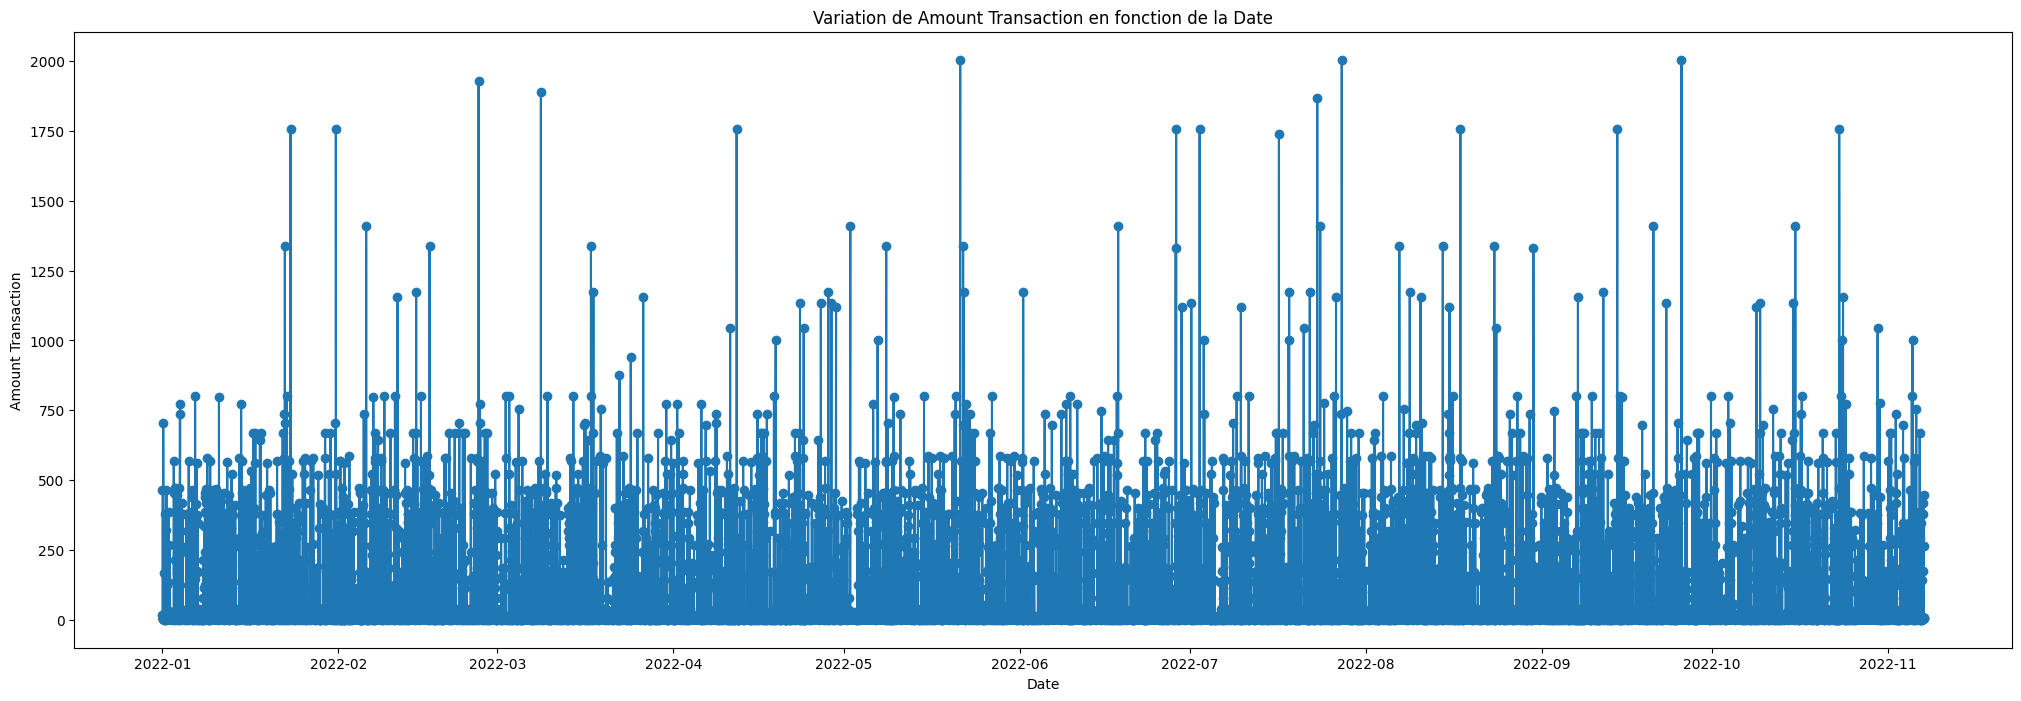

In [ ]:
# @title Afficher les tendances
# Triez la DataFrame par 'date'
#clean_data['Date'] = pd.to_datetime(clean_data['Date'])


plt.figure(figsize=(25, 8))
# Affichez la variation de 'amount_transaction' en fonction de 'date'
plt.plot(clean_data['Date'], clean_data['amount_transaction'], marker='o')
plt.xlabel('Date')
plt.ylabel('Amount Transaction')
plt.title('Variation de Amount Transaction en fonction de la Date')
plt.show()

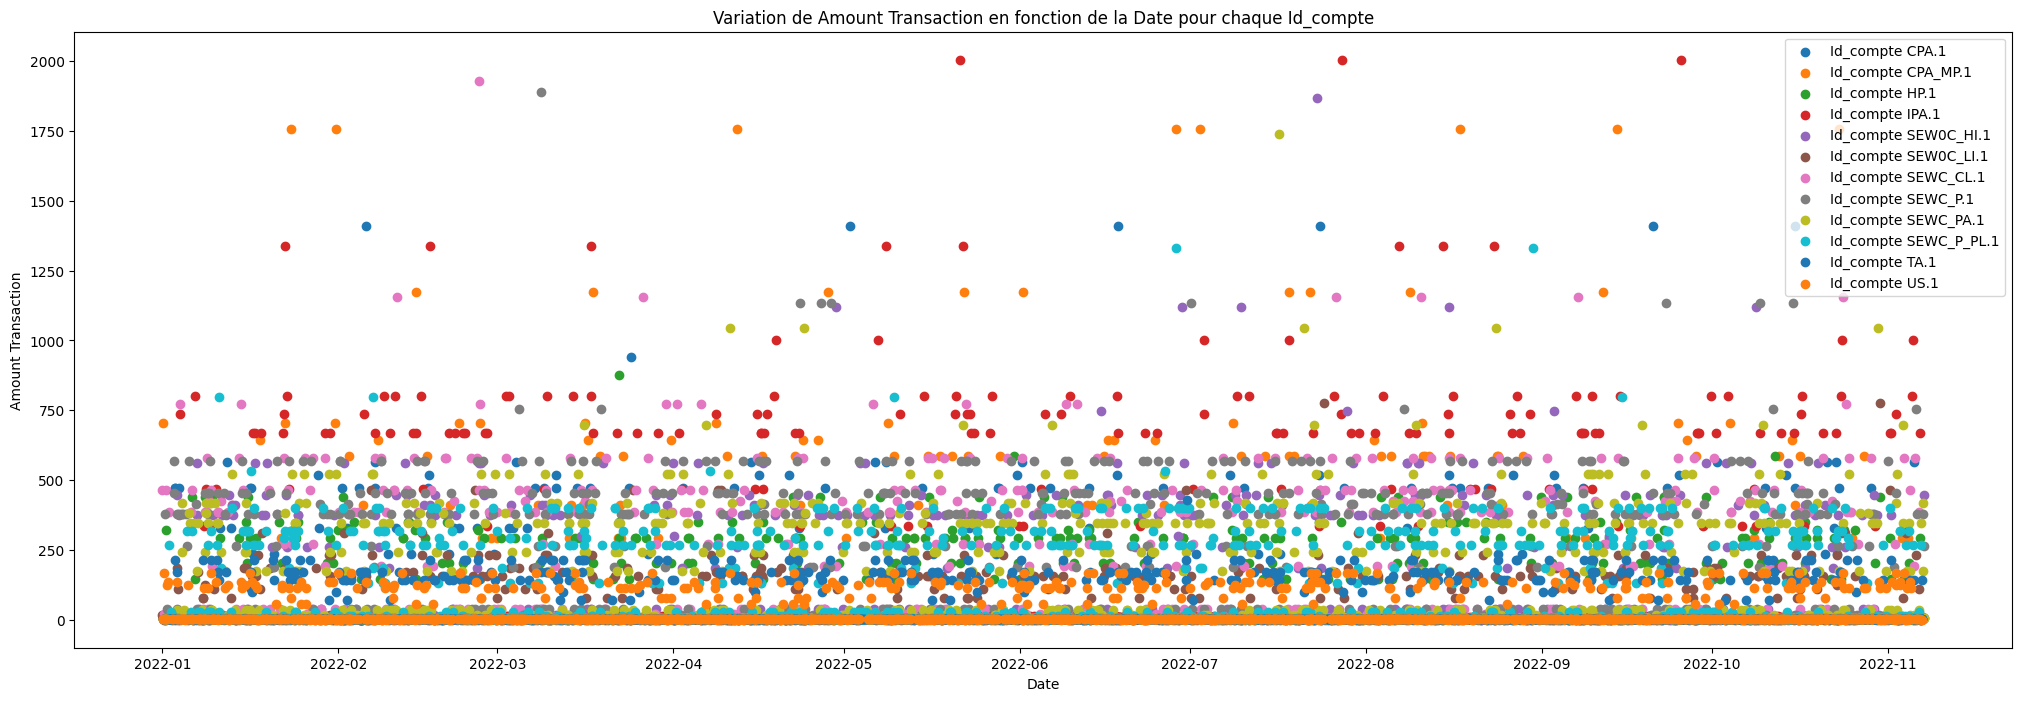

In [ ]:
# Créez un graphique pour chaque catégorie dans 'Id_compte'
plt.figure(figsize=(25, 8))
clean_data1=clean_data
for category, group in clean_data1.groupby('Id_compte'):
    plt.scatter(group['Date'], group['amount_transaction'], marker='o', label=f'Id_compte {category}')

plt.xlabel('Date')
plt.ylabel('Amount Transaction')
plt.title('Variation de Amount Transaction en fonction de la Date pour chaque Id_compte')
plt.legend()
plt.show()

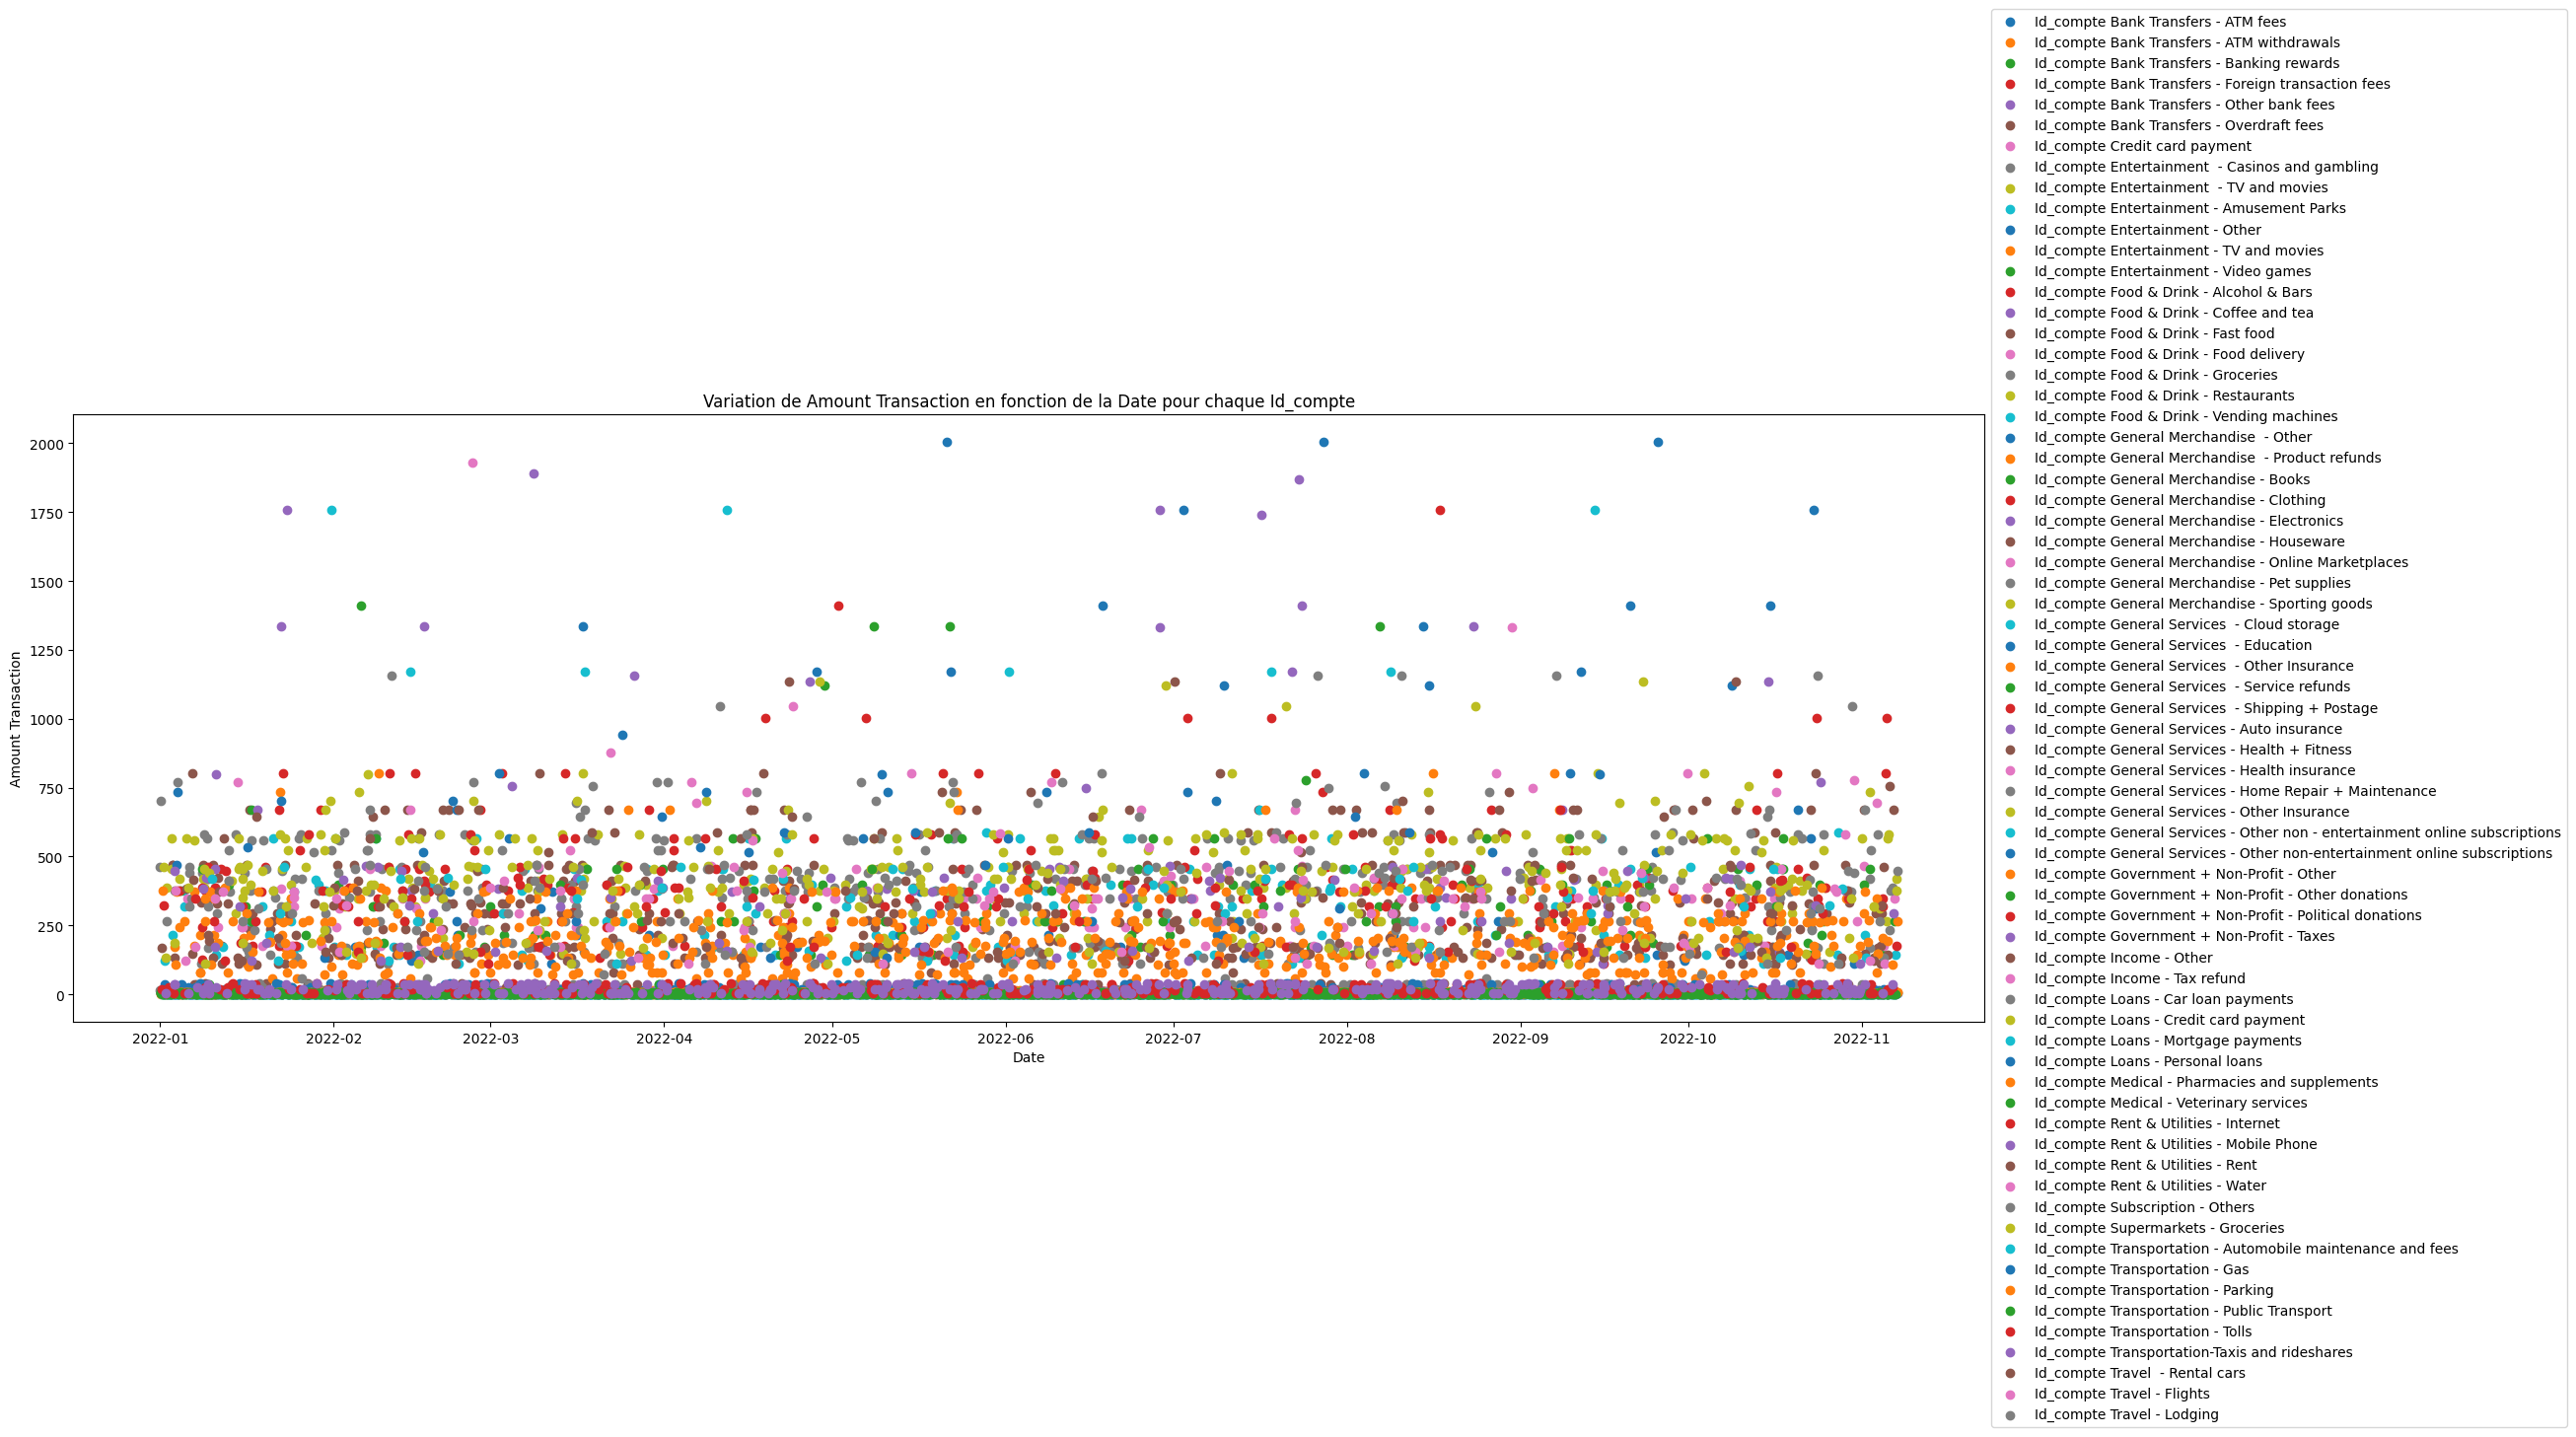

In [ ]:
clean_data2=clean_data
# Créez un graphique pour chaque catégorie dans 'Id_compte'
plt.figure(figsize=(25, 8))
for category, group in clean_data2.groupby('category_transaction'):
    plt.scatter(group['Date'], group['amount_transaction'], marker='o', label=f'Id_compte {category}')

plt.xlabel('Date')
plt.ylabel('Amount Transaction')
plt.title('Variation de Amount Transaction en fonction de la Date pour chaque Id_compte')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#clean_data['Date'] = pd.to_datetime(clean_data['Date'])
# Utilisez seaborn pour créer un catplot
sns.catplot(x='Date', y='amount_transaction', hue='CPA.1', data = clean_data, kind='point')

plt.xlabel('Date')
plt.ylabel('Amount Transaction')
plt.title('Variation de Amount Transaction en fonction de la Date pour CPA.1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

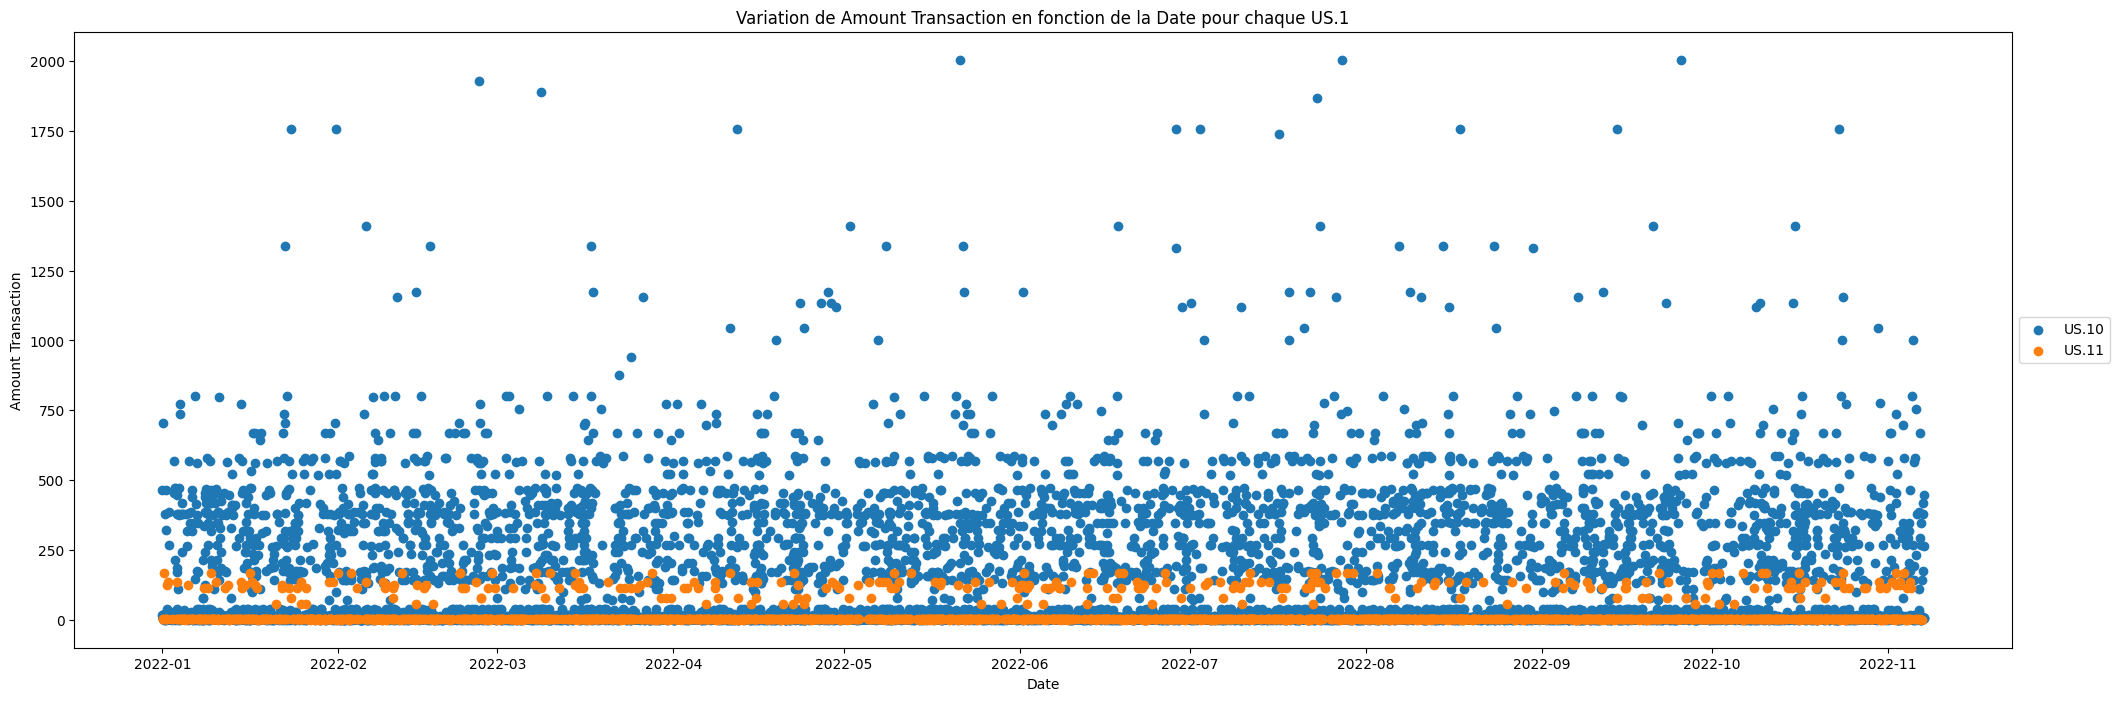

In [ ]:
clean_data3=clean_data
# Créez un graphique pour chaque catégorie dans 'Id_compte'
plt.figure(figsize=(25, 8))
for category1, group1 in clean_data3.groupby('US.1'):
    plt.scatter(group1['Date'], group1['amount_transaction'], marker='o', label=f'US.1{category1}')

plt.xlabel('Date')
plt.ylabel('Amount Transaction')
plt.title('Variation de Amount Transaction en fonction de la Date pour chaque US.1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

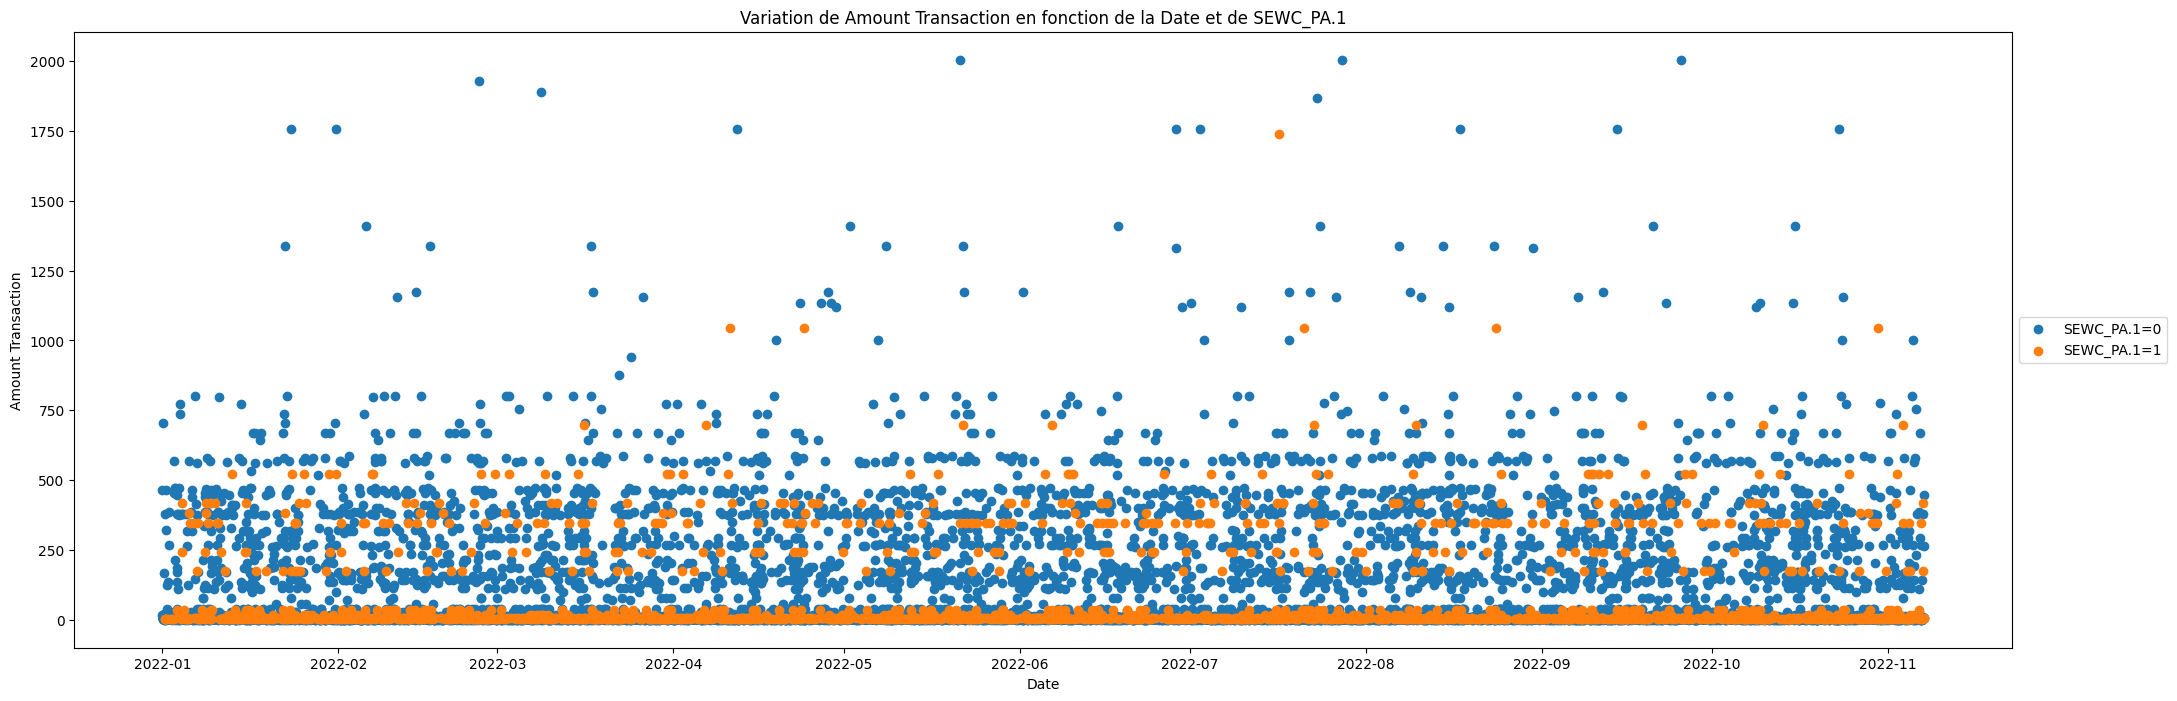

In [ ]:
# Création du graphique
plt.figure(figsize=(25, 8))

# Tracer les variations de 'amount_transaction'
for SEWC_PA_value, group in clean_data.groupby('SEWC_PA.1'):
    plt.scatter(group['Date'], group['amount_transaction'], label=f'SEWC_PA.1={SEWC_PA_value}')

# Ajouter la légende à l'extrême droit
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ajouter des étiquettes et un titre
plt.xlabel('Date')
plt.ylabel('Amount Transaction')
plt.title('Variation de Amount Transaction en fonction de la Date et de SEWC_PA.1')

# Afficher le graphique
plt.show()

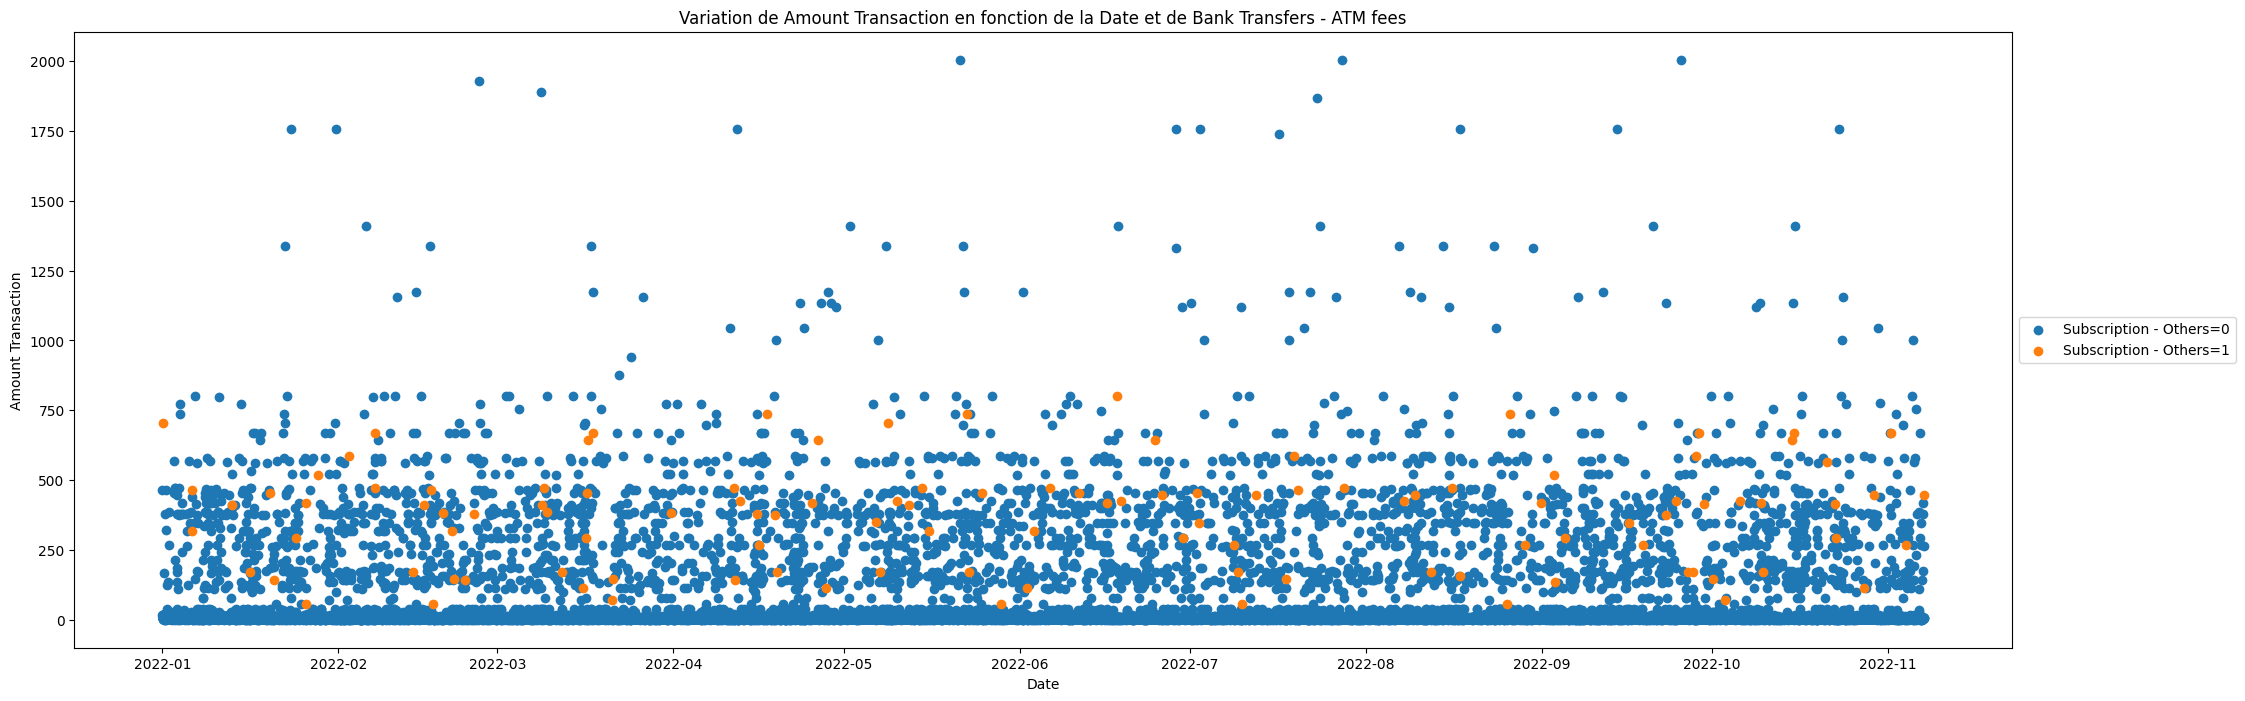

In [ ]:
clean_data4=clean_data
# Création du graphique
plt.figure(figsize=(25, 8))

# Tracer les variations de 'amount_transaction'
for Bank_value, group in clean_data4.groupby('Subscription - Others'):
    plt.scatter(group['Date'], group['amount_transaction'], label=f'Subscription - Others={Bank_value}')

# Ajouter la légende à l'extrême droit
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ajouter des étiquettes et un titre
plt.xlabel('Date')
plt.ylabel('Amount Transaction')
plt.title('Variation de Amount Transaction en fonction de la Date et de Bank Transfers - ATM fees')

# Afficher le graphique
plt.show()

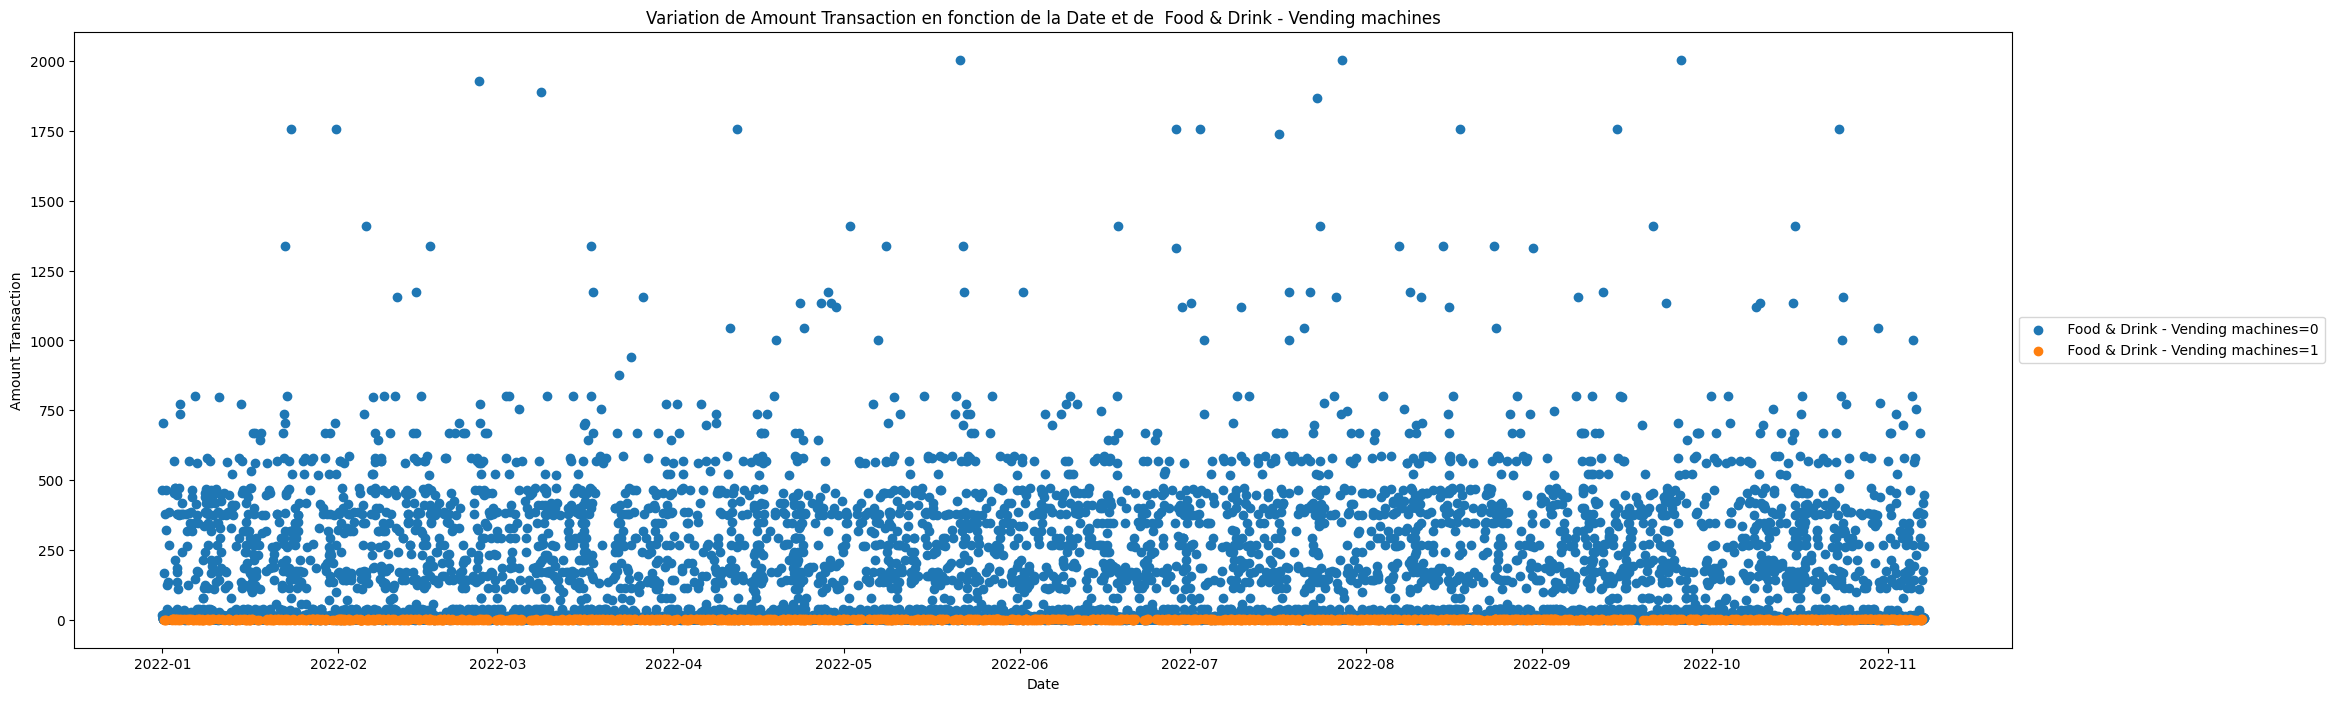

In [ ]:
clean_data5=clean_data
# Création du graphique
plt.figure(figsize=(25, 8))

# Tracer les variations de 'amount_transaction'
for Bank_value5, group5 in clean_data5.groupby('Food & Drink - Vending machines'):
    plt.scatter(group5['Date'], group5['amount_transaction'], label=f' Food & Drink - Vending machines={Bank_value5}')

# Ajouter la légende à l'extrême droit
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ajouter des étiquettes et un titre
plt.xlabel('Date')
plt.ylabel('Amount Transaction')
plt.title('Variation de Amount Transaction en fonction de la Date et de  Food & Drink - Vending machines')

# Afficher le graphique
plt.show()

In [ ]:
category_description = clean_data5[clean_data5['category_transaction'] == 'Food & Drink - Vending machines']['amount_transaction'].describe()

# Afficher la description
print(category_description)

count    1214.000000
mean        1.161071
std         0.867084
min         0.230000
25%         0.310000
50%         1.120000
75%         1.680000
max         2.860000
Name: amount_transaction, dtype: float64


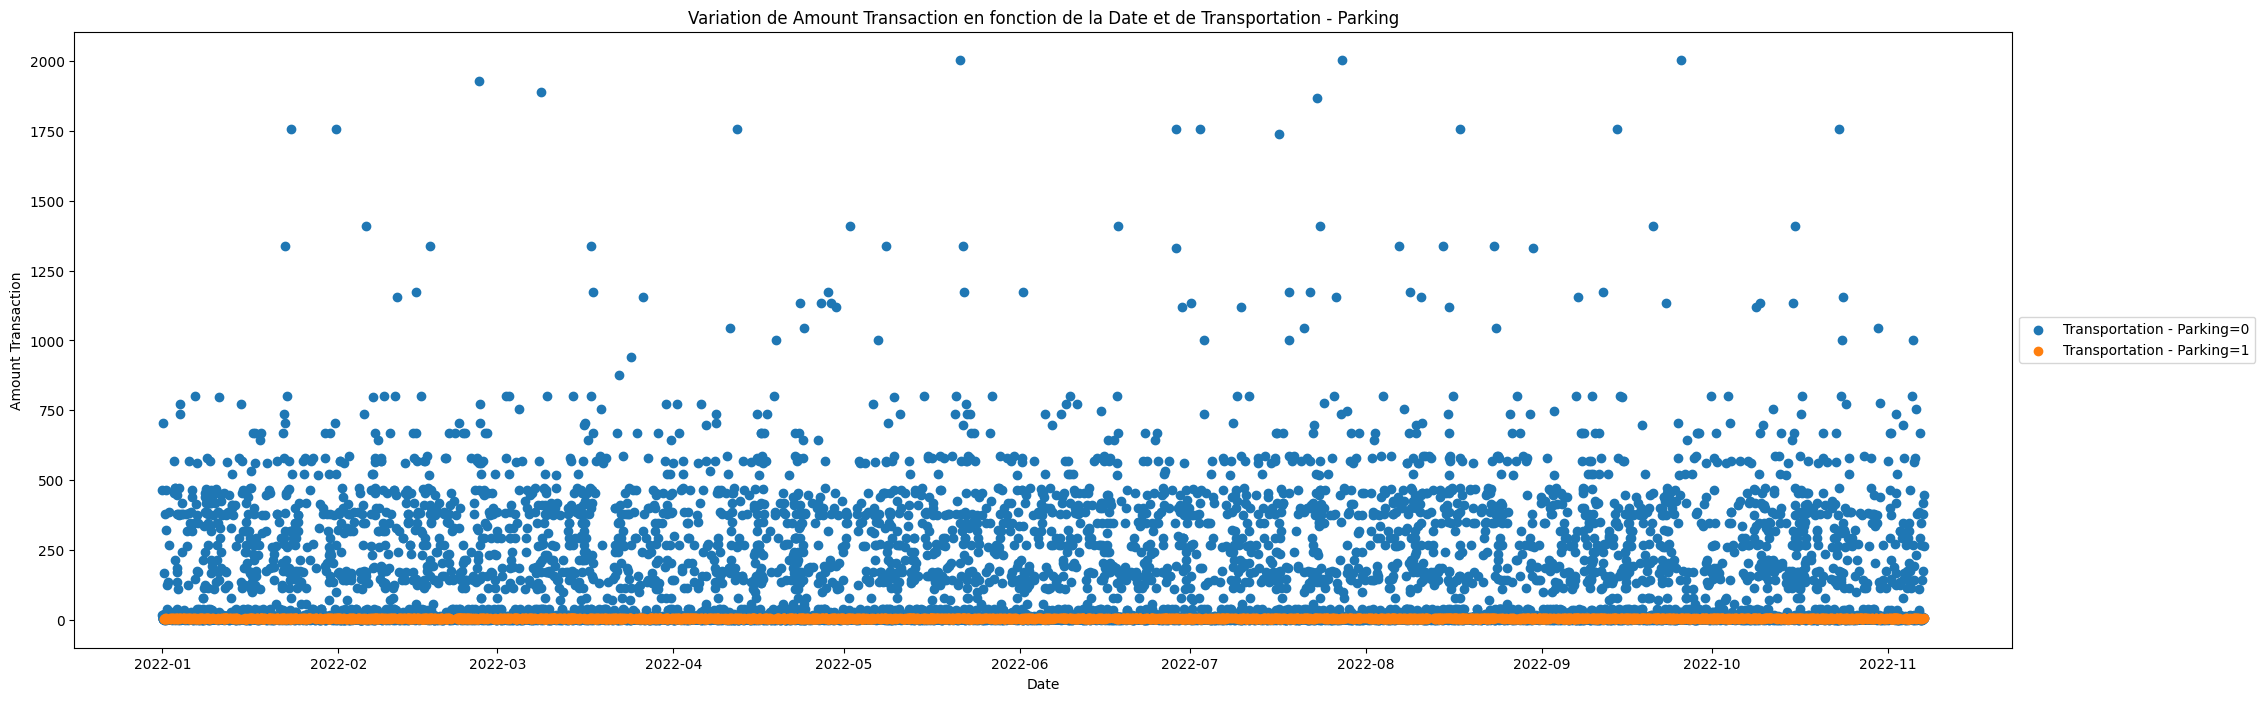

In [ ]:
clean_data6=clean_data
# Création du graphique
plt.figure(figsize=(25, 8))

# Tracer les variations de 'amount_transaction'
for Bank_value, group in clean_data6.groupby('Transportation - Parking'):
    plt.scatter(group['Date'], group['amount_transaction'], label=f'Transportation - Parking={Bank_value}')

# Ajouter la légende à l'extrême droit
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ajouter des étiquettes et un titre
plt.xlabel('Date')
plt.ylabel('Amount Transaction')
plt.title('Variation de Amount Transaction en fonction de la Date et de Transportation - Parking')

# Afficher le graphique
plt.show()

In [ ]:
# @title Clean dataset
# Convertir 'Date' en caractéristiques numériques
data = data.sort_values(by=['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Hour'] = data['Date'].dt.hour  # Ajout de l'heure
data['Minute'] = data['Date'].dt.minute
data['Second'] = data['Date'].dt.second

# Sélection des colonnes pertinentes dans un nouveau DataFrame
data_brut = data[['Date', 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'Minute', 'Second', 'amount_transaction']]

In [ ]:
date_counts = data_brut['Date'].value_counts()

# Afficher le nombre de lignes pour chaque date
print(date_counts)


2022-06-29 13:23:00    3
2022-05-23 15:32:00    3
2022-04-22 15:23:00    2
2022-07-11 18:46:00    2
2022-02-20 18:27:00    2
                      ..
2022-04-15 14:01:00    1
2022-04-15 13:57:00    1
2022-04-15 13:37:00    1
2022-04-15 13:30:00    1
2022-11-07 06:48:00    1
Name: Date, Length: 19984, dtype: int64


In [ ]:
# Utilisez get_dummies pour créer une DataFrame avec des colonnes indicatrices
df_with_dummies = pd.get_dummies(data['Id_compte'])
#df_with_dummies1 = pd.get_dummies(data['category_transaction'])
# Concaténez la DataFrame d'origine avec la nouvelle DataFrame
clean_data = pd.concat([data_brut, df_with_dummies], axis=1)
#clean_data = clean_data.sort_values(by=['Year', 'Month', 'Day','Hour'])

In [ ]:
# Créer la colonne 'minute_count' en utilisant la somme cumulative des minutes
clean_data['minute_count'] = clean_data['Minute'].cumsum()

In [ ]:
clean_data

Date  Year  Month  Day  DayOfWeek  Hour  Minute  Second  \
0     2022-01-01 00:23:00  2022      1    1          5     0      23       0   
1     2022-01-01 00:26:00  2022      1    1          5     0      26       0   
2     2022-01-01 01:01:00  2022      1    1          5     1       1       0   
3     2022-01-01 01:21:00  2022      1    1          5     1      21       0   
4     2022-01-01 01:54:00  2022      1    1          5     1      54       0   
...                   ...   ...    ...  ...        ...   ...     ...     ...   
20406 2022-11-07 05:42:00  2022     11    7          0     5      42       0   
20407 2022-11-07 05:56:00  2022     11    7          0     5      56       0   
20408 2022-11-07 06:36:00  2022     11    7          0     6      36       0   
20409 2022-11-07 06:37:00  2022     11    7          0     6      37       0   
20410 2022-11-07 06:48:00  2022     11    7          0     6      48       0   

       amount_transaction  CPA.1  ...  IPA.1  SEW0C_HI.1  SEW0C_LI.1  \
0                  462.96      0  ...      0           0           0   
1                   15.51      0  ...      0           0           1   
2                    2.24      0  ...      0           0           0   
3                    2.86      0  ...      0           0           0   
4                    1.68      0  ...      0           0           0   
...                   ...    ...  ...    ...         ...         ...   
20406              264.60      0  ...      0           0           0   
20407                4.63      0  ...      0           0           0   
20408                6.96      0  ...      0           0           0   
20409              448.44      0  ...      0           1           0   
20410                7.47      0  ...      0           1           0   

       SEWC_CL.1  SEWC_P.1  SEWC_PA.1  SEWC_P_PL.1  TA.1  US.1  minute_count  
0              1         0          0            0     0     0            23  
1              0         0          0            0     0     0            49  
2              0         0          0            0     0     1            50  
3              0         0          0            0     1     0            71  
4              0         0          0            0     0     1           125  
...          ...       ...        ...          ...   ...   ...           ...  
20406          0         1          0            0     0     0        598074  
20407          1         0          0            0     0     0        598130  
20408          0         0          1            0     0     0        598166  
20409          0         0          0            0     0     0        598203  
20410          0         0          0            0     0     0        598251  

[20411 rows x 22 columns]

In [ ]:
clean_data.describe()

Year         Month           Day     DayOfWeek          Hour  \
count  20411.0  20411.000000  20411.000000  20411.000000  20411.000000   
mean    2022.0      5.643183     15.565773      3.022292     11.511587   
std        0.0      2.941053      8.772520      2.012952      6.872044   
min     2022.0      1.000000      1.000000      0.000000      0.000000   
25%     2022.0      3.000000      8.000000      1.000000      6.000000   
50%     2022.0      6.000000     16.000000      3.000000     11.000000   
75%     2022.0      8.000000     23.000000      5.000000     17.000000   
max     2022.0     11.000000     31.000000      6.000000     23.000000   

             Minute   Second  amount_transaction         CPA.1      CPA_MP.1  \
count  20411.000000  20411.0        20411.000000  20411.000000  20411.000000   
mean      29.310225      0.0           56.955119      0.049238      0.051247   
std       17.356384      0.0          150.401661      0.216370      0.220506   
min        0.000000      0.0            0.230000      0.000000      0.000000   
25%       14.000000      0.0            2.790000      0.000000      0.000000   
50%       29.000000      0.0            4.700000      0.000000      0.000000   
75%       44.000000      0.0            8.790000      0.000000      0.000000   
max       59.000000      0.0         2005.200000      1.000000      1.000000   

       ...         IPA.1    SEW0C_HI.1    SEW0C_LI.1     SEWC_CL.1  \
count  ...  20411.000000  20411.000000  20411.000000  20411.000000   
mean   ...      0.053501      0.105972      0.097692      0.090343   
std    ...      0.225035      0.307810      0.296906      0.286680   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

           SEWC_P.1     SEWC_PA.1   SEWC_P_PL.1          TA.1          US.1  \
count  20411.000000  20411.000000  20411.000000  20411.000000  20411.000000   
mean       0.097937      0.102543      0.097447      0.090392      0.090098   
std        0.297237      0.303368      0.296573      0.286750      0.286330   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        minute_count  
count   20411.000000  
mean   299748.925089  
std    172487.595096  
min        23.000000  
25%    150587.000000  
50%    300295.000000  
75%    448408.000000  
max    598251.000000  

[8 rows x 21 columns]

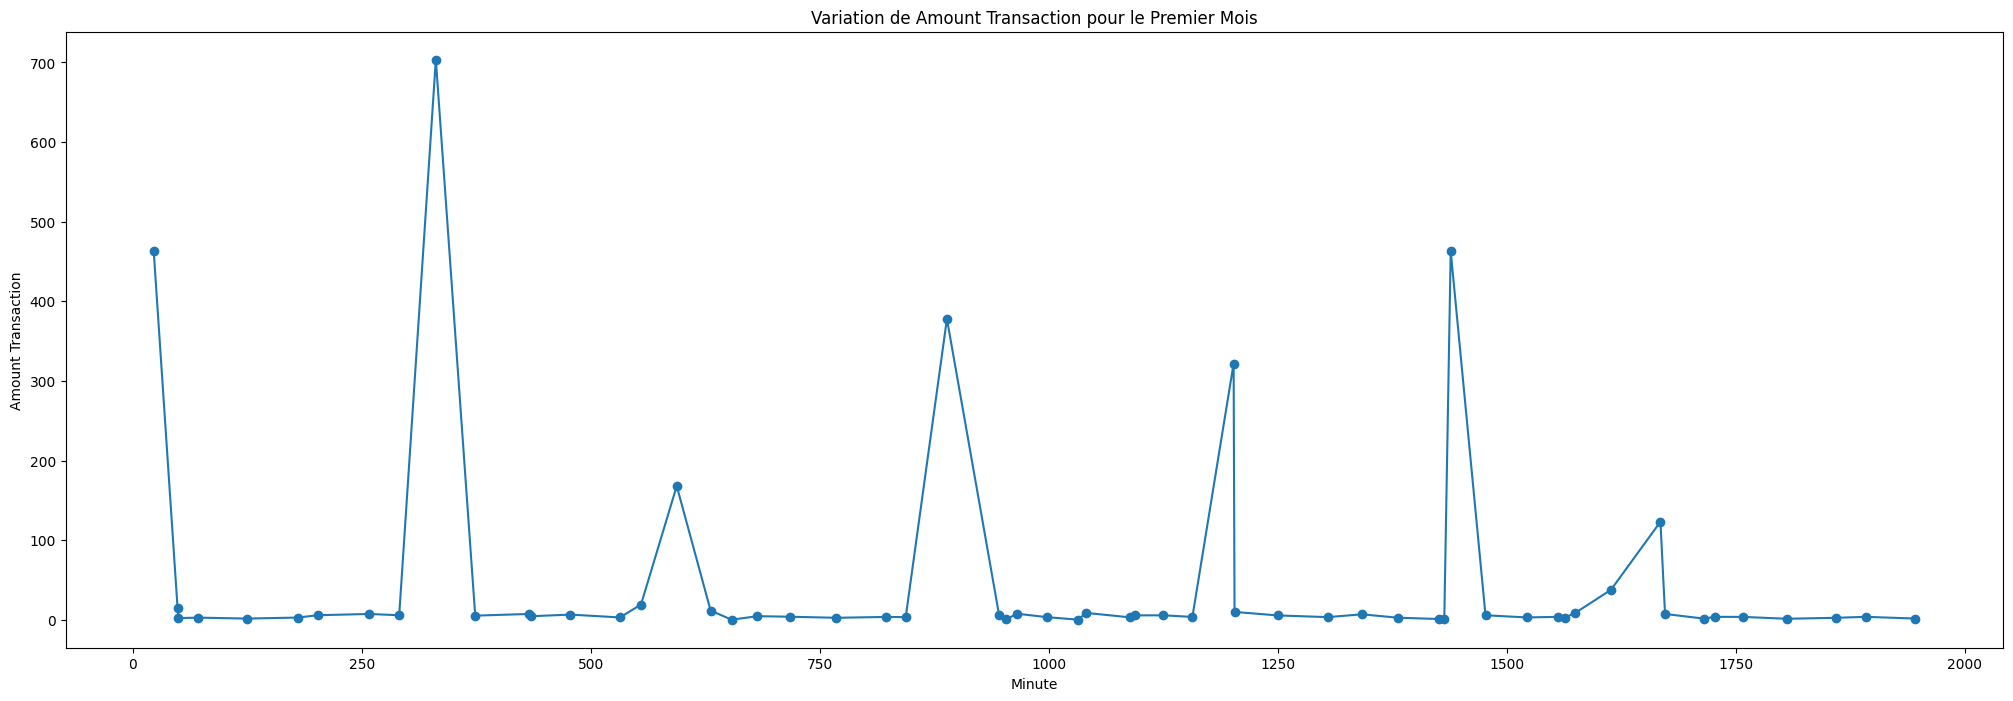

In [ ]:
# Filtrer les données pour le premier mois, le premier jour et l'heure 0
for i in range(100  ):
    first_month_data = clean_data.loc[
        (clean_data['Month'] == 1) & (clean_data['Day'] == i)
    ]
    # Tracer le graphique
    plt.figure(figsize=(25, 8))
    plt.plot(first_month_data['minute_count'], first_month_data['amount_transaction'], marker='o')
    plt.xlabel('Minute')
    plt.ylabel('Amount Transaction')
    plt.title('Variation de Amount Transaction pour le Premier Mois')
    plt.show()

In [ ]:
first_month_data

Empty DataFrame
Columns: [Date, Year, Month, Day, DayOfWeek, Hour, Minute, Second, amount_transaction, CPA.1, CPA_MP.1, HP.1, IPA.1, SEW0C_HI.1, SEW0C_LI.1, SEWC_CL.1, SEWC_P.1, SEWC_PA.1, SEWC_P_PL.1, TA.1, US.1, Bank Transfers - ATM fees, Bank Transfers - ATM withdrawals, Bank Transfers - Banking rewards, Bank Transfers - Foreign transaction fees, Bank Transfers - Other bank fees, Bank Transfers - Overdraft fees, Credit card payment, Entertainment  - Casinos and gambling, Entertainment  - TV and movies, Entertainment - Amusement Parks, Entertainment - Other, Entertainment - TV and movies, Entertainment - Video games, Food & Drink - Alcohol & Bars, Food & Drink - Coffee and tea, Food & Drink - Fast food, Food & Drink - Food delivery, Food & Drink - Groceries, Food & Drink - Restaurants, Food & Drink - Vending machines, General Merchandise  - Other, General Merchandise  - Product refunds, General Merchandise - Books, General Merchandise - Clothing, General Merchandise - Electronics, General Merchandise - Houseware, General Merchandise - Online Marketplaces, General Merchandise - Pet supplies, General Merchandise - Sporting goods, General Services  - Cloud storage, General Services  - Education, General Services  - Other Insurance, General Services  - Service refunds, General Services  - Shipping + Postage, General Services - Auto insurance, General Services - Health + Fitness, General Services - Health insurance, General Services - Home Repair + Maintenance, General Services - Other Insurance, General Services - Other non - entertainment online subscriptions, General Services - Other non-entertainment online subscriptions, Government + Non-Profit - Other, Government + Non-Profit - Other donations, Government + Non-Profit - Political donations, Government + Non-Profit - Taxes, Income - Other, Income - Tax refund, Loans - Car loan payments, Loans - Credit card payment, Loans - Mortgage payments , Loans - Personal loans, Medical - Pharmacies and supplements, Medical - Veterinary services, Rent & Utilities - Internet, Rent & Utilities - Mobile Phone, Rent & Utilities - Rent, Rent & Utilities - Water, Subscription - Others, Supermarkets - Groceries, Transportation - Automobile maintenance and fees, Transportation - Gas, Transportation - Parking, Transportation - Public Transport, Transportation - Tolls, Transportation-Taxis and rideshares, Travel  - Rental cars, Travel - Flights, Travel - Lodging, minute_count]
Index: []

[0 rows x 90 columns]

In [ ]:
clean_data

Year  Month  Day  DayOfWeek  Hour  amount_transaction  CPA.1  CPA_MP.1  \
0      2022      1    1          5     0              462.96      0         0   
1      2022      1    1          5     0               15.51      0         0   
2      2022      1    1          5     1                2.24      0         0   
3      2022      1    1          5     1                2.86      0         0   
4      2022      1    1          5     1                1.68      0         0   
...     ...    ...  ...        ...   ...                 ...    ...       ...   
20406  2022     11    7          0     5              264.60      0         0   
20407  2022     11    7          0     5                4.63      0         0   
20408  2022     11    7          0     6                6.96      0         0   
20409  2022     11    7          0     6              448.44      0         0   
20410  2022     11    7          0     6                7.47      0         0   

       HP.1  IPA.1  ...  Supermarkets - Groceries  \
0         0      0  ...                         0   
1         0      0  ...                         0   
2         0      0  ...                         0   
3         0      0  ...                         0   
4         0      0  ...                         0   
...     ...    ...  ...                       ...   
20406     0      0  ...                         0   
20407     0      0  ...                         0   
20408     0      0  ...                         0   
20409     0      0  ...                         0   
20410     0      0  ...                         0   

       Transportation - Automobile maintenance and fees  Transportation - Gas  \
0                                                     0                     0   
1                                                     0                     0   
2                                                     0                     0   
3                                                     0                     0   
4                                                     0                     0   
...                                                 ...                   ...   
20406                                                 0                     0   
20407                                                 0                     0   
20408                                                 0                     0   
20409                                                 0                     0   
20410                                                 0                     0   

       Transportation - Parking  Transportation - Public Transport  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  1   
4                             0                                  0   
...                         ...                                ...   
20406                         0                                  0   
20407                         0                                  0   
20408                         1                                  0   
20409                         0                                  0   
20410                         0                                  0   

       Transportation - Tolls  Transportation-Taxis and rideshares  \
0                           0                                    0   
1                           0                                    0   
2                           0                                    0   
3                           0                                    0   
4                           0                                    0   
...                       ...                                  ...   
20406                       0                                    0   
20407                  

In [ ]:
import statsmodels.api as sm

In [ ]:
y1 = clean_data.set_index('Date')['amount_transaction']

In [ ]:
import statsmodels.api as sm
from itertools import product

# Définir les ordres max pour la recherche de grille
p = d = q = range(0, 2)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # 12 pour une saisonnalité annuelle

# Effectuer la recherche de grille
best_aic = float("inf")
best_order = None
best_seasonal_order = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                y1,
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False,
            )
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = param_seasonal
        except:
            continue

print(f"Best SARIMAX Order: {best_order}")
print(f"Best Seasonal Order: {best_seasonal_order}")


In [ ]:
# Créer un modèle SARIMAX sur l'ensemble d'entraînement
model = sm.tsa.SARIMAX(y_train, exog=x_train, order=(1, 0, 1), seasonal_order=(0, 1, 1, 12))

# Ajuster le modèle aux données d'entraînement
results = model.fit()

# Faire des prédictions sur l'ensemble de test
predictions = results.get_forecast(steps=len(x_test), exog=x_test)

# Calculer l'erreur (par exemple, l'erreur quadratique moyenne)
mse = mean_squared_error(y_test, predictions.predicted_mean)
print(f'Mean Squared Error (MSE): {mse}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error (MSE): 23928.416720309284
